<a href="https://colab.research.google.com/github/Muhfauzi89/Phyton/blob/main/Finpro/Tim_Aether_Notebook_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

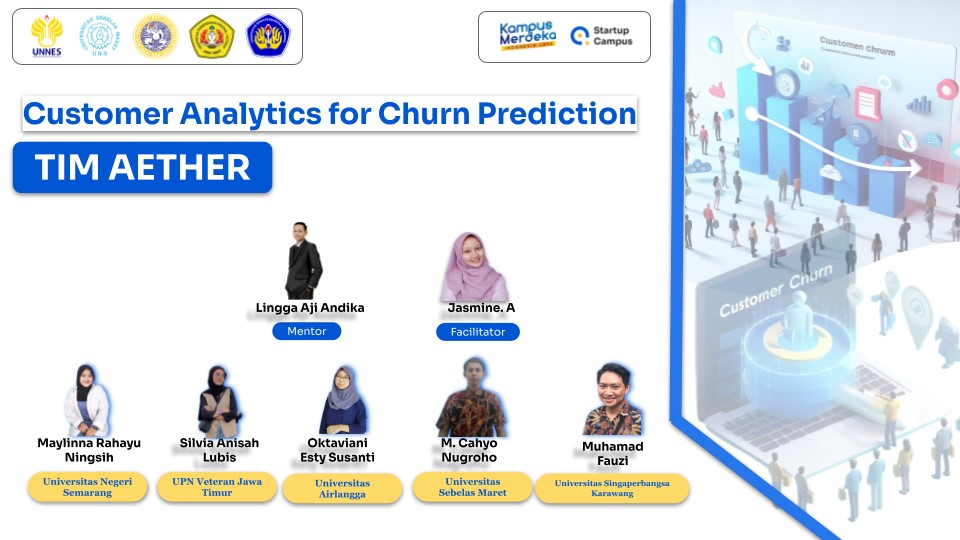

# <center> FINAL PROJECT **AETHER**

Topik:
> Costumer Churn

Tujuan:
> mendalami pemahaman terhadap faktor-faktor yang memengaruhi perilaku churn pada pelanggan. Dengan mendefinisikan churn sebagai keadaan di mana pelanggan tidak melakukan pembelian dalam jangka waktu lebih dari satu tahun sejak transaksi terakhirnya, eksperimen ini bertujuan untuk mengidentifikasi pola dan karakteristik yang dapat menjadi indikator kuat terjadinya churn. Analisis tersebut diharapkan dapat memberikan wawasan mendalam terkait faktor-faktor kritis yang dapat digunakan sebagai dasar untuk merancang strategi retensi pelanggan yang lebih efektif.
* Analisis pengaruh usia, aktivitas, dan kebiasaan belanja
pola transaksi pelanggan untuk mengidentifikasi tren pembelian, frekuensi, dan nilai transaksi.
* faktor-faktor yang mempengaruhi tingkat churn, seperti aktivitas pelanggan, dan penggunaan promo
* merancang strategi retensi pelanggan yang efektif




In [ ]:
 #Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Costumer

In [ ]:
customer = pd.read_csv("/content/drive/MyDrive/[SC5DS] Mockup Dataset/customer.csv")
customer.head()

customer_id first_name    last_name                              username  \
0         2870       Lala      Maryati  671a0865-ac4e-4dc4-9c4f-c286a1176f7e   
1         8193   Maimunah   Laksmiwati  83be2ba7-8133-48a4-bbcb-b46a2762473f   
2         7279    Bakiman  Simanjuntak  3250e5a3-1d23-4675-a647-3281879d42be   
3        88813    Cahyadi    Maheswara  df797edf-b465-4a80-973b-9fbb612260c2   
4        82542    Irnanto       Wijaya  36ab08e1-03de-42a8-9e3b-59528c798824   

                                               email gender   birthdate  \
0  671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...      F  1996-06-14   
1  83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...      F  1993-08-16   
2  3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M  1989-01-23   
3  df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...      M  1991-01-05   
4  36ab08e1_03de_42a8_9e3b_59528c798824@startupca...      M  2000-07-15   

  device_type                             device_id  \
0         iOS  c9c0de76-0a6c-4ac2-843f-65264ab9fe63   
1     Android  fb331c3d-f42e-40fe-afe2-b4b73a8a6e25   
2         iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
3         iOS  f4c18515-c5be-419f-8142-f037be47c9cd   
4         iOS  e46e4c36-4630-4736-8fcf-663db29ca3b0   

                               device_version  home_location_lat  \
0  iPhone; CPU iPhone OS 14_2_1 like Mac OS X          -1.043345   
1                               Android 2.2.1          -6.212489   
2       iPad; CPU iPad OS 4_2_1 like Mac OS X          -8.631607   
3        iPad; CPU iPad OS 14_2 like Mac OS X           1.299332   
4  iPhone; CPU iPhone OS 10_3_3 like Mac OS X          -2.980807   

   home_location_long        home_location home_country first_join_date  
0          101.360523       Sumatera Barat    Indonesia      2019-07-21  
1          106.818850         Jakarta Raya    Indonesia      2017-07-16  
2          116.428436  Nusa Tenggara Barat    Indonesia      2020-08-23  
3          115.774934     Kalimantan Timur    Indonesia      2021-10-03  
4          114.924675   Kalimantan Selatan    Indonesia      2021-04-11

## Cek Missing value

In [ ]:
customer.isnull().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
customer.describe(include = 'object').transpose()

count  unique  \
first_name       100000     707   
last_name        100000     173   
username         100000  100000   
email            100000  100000   
gender           100000       2   
birthdate        100000   13003   
device_type      100000       2   
device_id        100000  100000   
device_version   100000      86   
home_location    100000      33   
home_country     100000       1   
first_join_date  100000    2223   

                                                               top    freq  
first_name                                                   Rahmi     560  
last_name                                                  Susanti    1028  
username                      671a0865-ac4e-4dc4-9c4f-c286a1176f7e       1  
email            671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...       1  
gender                                                           F   64230  
birthdate                                               1999-07-31      54  
device_type                                                Android   76637  
device_id                     c9c0de76-0a6c-4ac2-843f-65264ab9fe63       1  
device_version                                       Android 2.2.2    1296  
home_location                                         Jakarta Raya   18715  
home_country                                             Indonesia  100000  
first_join_date                                         2021-07-31     341

## Insight dan Visualisasi

<Axes: ylabel='gender'>

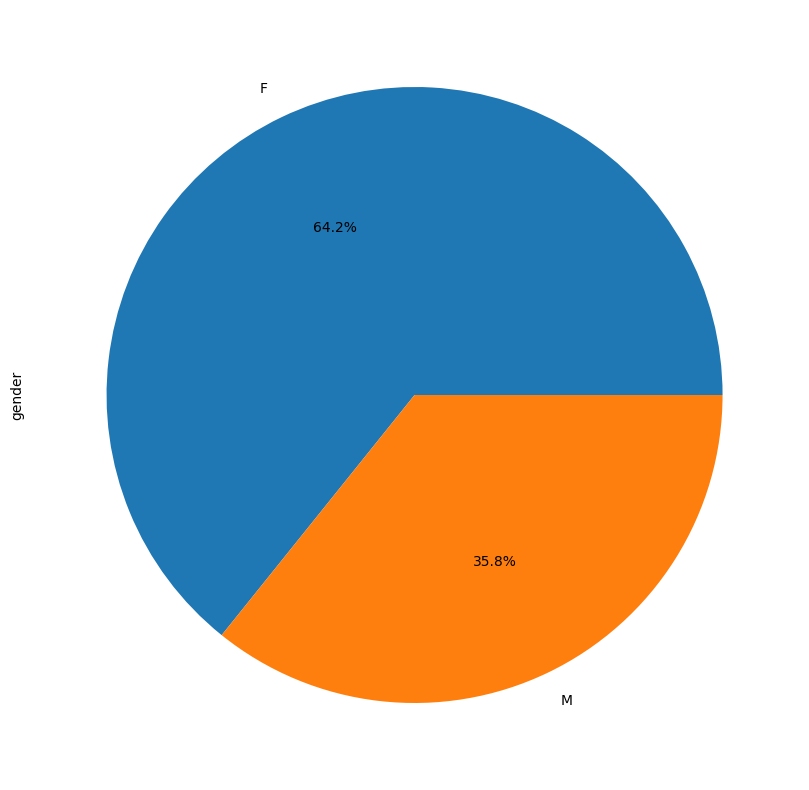

In [ ]:
#presantase tiap kategori
customer['gender'].value_counts().plot(figsize=(10,10),kind='pie', autopct = "%.1f%%")

<Axes: ylabel='device_type'>

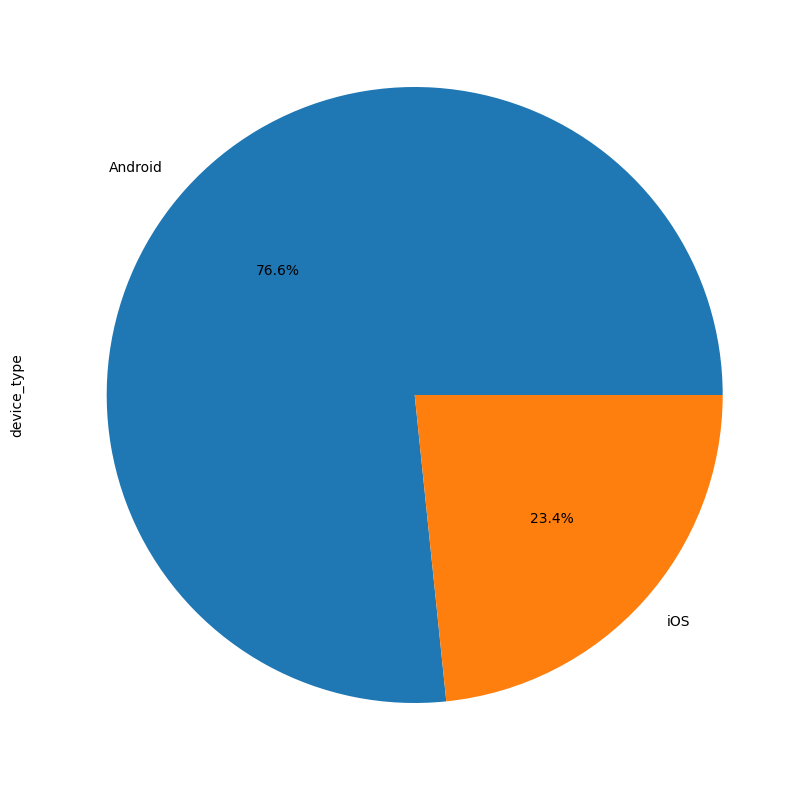

In [ ]:
#presantase tiap kategori
customer['device_type'].value_counts().plot(figsize=(10,10),kind='pie', autopct = "%.1f%%")

# Transaction

In [ ]:
transactions = pd.read_csv("/content/drive/MyDrive/[SC5DS] Mockup Dataset/transactions.csv")
transactions.head()

created_at  customer_id  \
0  2018-07-29T15:22:01.458193Z         5868   
1  2018-07-30T12:40:22.365620Z         4774   
2  2018-09-15T11:51:17.365620Z         4774   
3  2018-11-01T11:23:48.365620Z         4774   
4  2018-12-18T11:20:30.365620Z         4774   

                             booking_id                            session_id  \
0  186e2bee-0637-4710-8981-50c2d737bc42  3abaa6ce-e320-4e51-9469-d9f3fa328e86   
1  caadb57b-e808-4f94-9e96-8a7d4c9898db  2ee5ead1-f13e-4759-92df-7ff48475e970   
2  6000fffb-9c1a-4f4a-9296-bc8f6b622b50  93325fb6-eb00-4268-bb0e-6471795a0ad0   
3  f5e530a7-4350-4cd1-a3bc-525b5037bcab  bcad5a61-1b67-448d-8ff4-781d67bc56e4   
4  0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2  df1042ab-13e6-4072-b9d2-64a81974c51a   

                                    product_metadata payment_method  \
0  [{'product_id': 54728, 'quantity': 1, 'item_pr...     Debit Card   
1  [{'product_id': 16193, 'quantity': 1, 'item_pr...    Credit Card   
2  [{'product_id': 53686, 'quantity': 4, 'item_pr...            OVO   
3  [{'product_id': 20228, 'quantity': 1, 'item_pr...    Credit Card   
4  [{'product_id': 55220, 'quantity': 1, 'item_pr...    Credit Card   

  payment_status  promo_amount   promo_code  shipment_fee  \
0        Success          1415  WEEKENDSERU         10000   
1        Success             0          NaN         10000   
2        Success             0          NaN         10000   
3        Success             0          NaN             0   
4        Success             0          NaN             0   

           shipment_date_limit  shipment_location_lat  shipment_location_long  \
0  2018-08-03T05:07:24.812676Z              -8.227893              111.969107   
1  2018-08-03T01:29:03.415705Z               3.013470              107.802514   
2  2018-09-18T08:41:49.422380Z              -2.579428              115.743885   
3  2018-11-05T17:42:27.954235Z              -3.602334              120.363824   
4  2018-12-23T17:24:07.361785Z              -3.602334              120.363824   

   total_amount  
0        199832  
1        155526  
2        550696  
3        271012  
4        198753

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
transactions.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
dtype: int64

## SPLIT product_metadata

In [ ]:
transactions['product_id'] = transactions.product_metadata.apply(lambda x:x.split(' ')[1][:-1])
transactions['quantity'] = transactions.product_metadata.apply(lambda x:x.split(' ')[3][:-1]).astype(int)
transactions['item_price'] = transactions.product_metadata.apply(lambda x:x.split(' ')[5][:-2]).astype(int)
transactions.drop('product_metadata',axis=1,inplace=True)

In [ ]:
transactions['product_id'] = transactions['product_id'].astype(int)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   payment_method          852584 non-null  object 
 5   payment_status          852584 non-null  object 
 6   promo_amount            852584 non-null  int64  
 7   promo_code              326536 non-null  object 
 8   shipment_fee            852584 non-null  int64  
 9   shipment_date_limit     852584 non-null  object 
 10  shipment_location_lat   852584 non-null  float64
 11  shipment_location_long  852584 non-null  float64
 12  total_amount            852584 non-null  int64  
 13  product_id              852584 non-null  int64  
 14  quantity            

## Insight & Visualisasi

<Axes: ylabel='payment_method'>

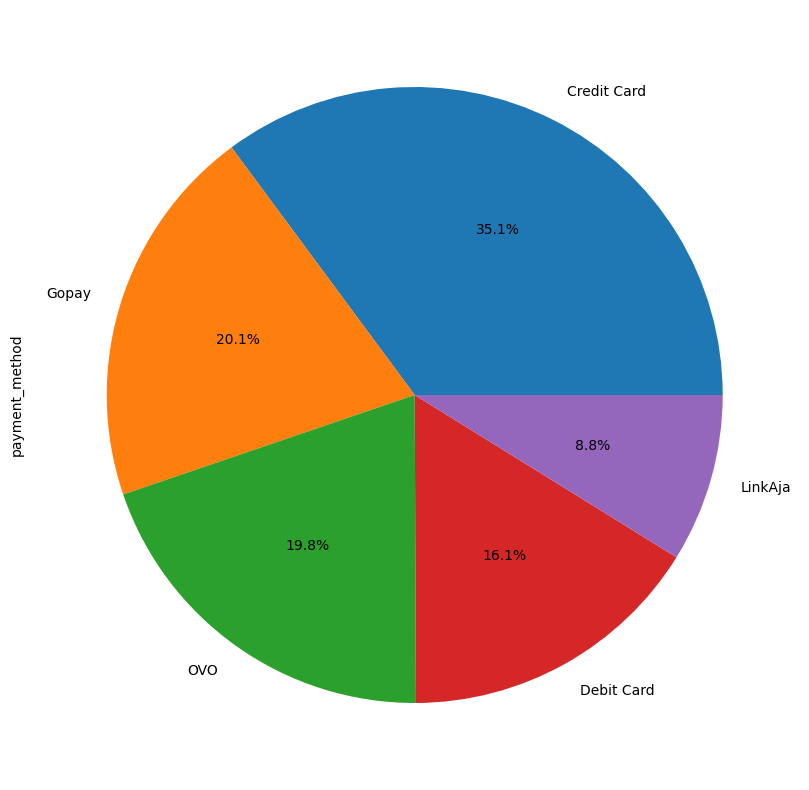

In [ ]:
#presantase tiap kategori
transactions['payment_method'].value_counts().plot(figsize=(10,10),kind='pie', autopct = "%.1f%%")

# **Joining Data Customer dan Transaction**

In [ ]:
#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Menggabungkan dataset customer dan transaction
df_gab = transactions.merge(right=customer, on='customer_id', how='left')

# Menampilkan hasil gabungan
df_gab

created_at  customer_id  \
0       2018-07-29T15:22:01.458193Z         5868   
1       2018-07-30T12:40:22.365620Z         4774   
2       2018-09-15T11:51:17.365620Z         4774   
3       2018-11-01T11:23:48.365620Z         4774   
4       2018-12-18T11:20:30.365620Z         4774   
...                             ...          ...   
852579  2021-09-21T22:10:05.074873Z        25121   
852580  2021-12-09T07:35:18.222046Z        34829   
852581  2021-12-11T01:20:36.944593Z        99645   
852582  2019-12-18T11:01:09.623382Z        87319   
852583  2019-12-19T12:47:14.701215Z        58180   

                                  booking_id  \
0       186e2bee-0637-4710-8981-50c2d737bc42   
1       caadb57b-e808-4f94-9e96-8a7d4c9898db   
2       6000fffb-9c1a-4f4a-9296-bc8f6b622b50   
3       f5e530a7-4350-4cd1-a3bc-525b5037bcab   
4       0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2   
...                                      ...   
852579  66f02fa4-c62e-497a-8b6e-be239009b50a   
852580  ccde6b83-ee42-4cce-b2cd-976574886eac   
852581  5bcd3434-1dc6-44bb-ae63-fd19714cbd6c   
852582  af7f291a-b01b-4bfd-89a9-237b16368b15   
852583  b242e188-5f94-4448-a038-c5865842374b   

                                  session_id payment_method payment_status  \
0       3abaa6ce-e320-4e51-9469-d9f3fa328e86     Debit Card        Success   
1       2ee5ead1-f13e-4759-92df-7ff48475e970    Credit Card        Success   
2       93325fb6-eb00-4268-bb0e-6471795a0ad0            OVO        Success   
3       bcad5a61-1b67-448d-8ff4-781d67bc56e4    Credit Card        Success   
4       df1042ab-13e6-4072-b9d2-64a81974c51a    Credit Card        Success   
...                                      ...            ...            ...   
852579  484eecde-9f4a-42de-a8df-7ce6668101f4     Debit Card         Failed   
852580  954e1211-4d45-4d0b-ba84-53e80119592c            OVO        Success   
852581  e6e6c108-abd0-49a2-b0a5-691117f9cfe1    Credit Card        Success   
852582  bb6e5426-a3f3-426a-b99d-79173eaa234b    Credit Card        Success   
852583  5e3183df-198b-40e0-b861-27ef694a832a          Gopay        Success   

        promo_amount   promo_code  shipment_fee          shipment_date_limit  \
0               1415  WEEKENDSERU         10000  2018-08-03T05:07:24.812676Z   
1                  0          NaN         10000  2018-08-03T01:29:03.415705Z   
2                  0          NaN         10000  2018-09-18T08:41:49.422380Z   
3                  0          NaN             0  2018-11-05T17:42:27.954235Z   
4                  0          NaN             0  2018-12-23T17:24:07.361785Z   
...              ...          ...           ...                          ...   
852579             0          NaN             0  2021-09-27T00:43:40.992167Z   
852580          5010       AZ2022         10000  2021-12-12T07:52:44.803822Z   
852581          2181  WEEKENDSERU          5000  2021-12-12T13:28:22.848703Z   
852582          4503       AZ2022             0  2019-12-23T22:56:46.831720Z   
852583          4724      BUYMORE         10000  2019-12-23T06:02:05.828334Z   

        ...  gender   birthdate  device_type  \
0       ...       F  2000-08-20      Android   
1       ...       F  1996-03-15      Android   
2       ...       F  1996-03-15      Android   
3       ...       F  1996-03-15      Android   
4       ...       F  1996-03-15      Android   
...     ...     ...         ...          ...   
852579  ...       M  1993-05-19      Android   
852580  ...       F  2006-04-21      Android   
852581  ...       F  1991-03-17      Android   
852582  ...       F  2007-10-26          iOS   
852583  ...       F  2003-11-04      Android   

                                   device_id  \
0       d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836   
1       cec6d891-746b-453e-a330-0f6d024929f6   
2       cec6d891-746b-453e-a330-0f6d024929f6   
3       cec6d891-746b-453e-a330-0f6d024929f6   
4       cec6d891-746b-453e-a330-0f6d024929f6   
...                                      ...   
852579  4e16

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   payment_method          852584 non-null  object 
 5   payment_status          852584 non-null  object 
 6   promo_amount            852584 non-null  int64  
 7   promo_code              326536 non-null  object 
 8   shipment_fee            852584 non-null  int64  
 9   shipment_date_limit     852584 non-null  object 
 10  shipment_location_lat   852584 non-null  float64
 11  shipment_location_long  852584 non-null  float64
 12  total_amount            852584 non-null  int64  
 13  product_id              852584 non-null  int64  
 14  quantity            

In [ ]:
df_gab['first_join_date'].head()

0    2018-07-28
1    2018-07-28
2    2018-07-28
3    2018-07-28
4    2018-07-28
Name: first_join_date, dtype: object

# Feature Engineering

In [ ]:
import pandas as pd

# Mengonversi kolom first_join_date dan created_at ke dalam format datetime
df_gab['first_join_date'] = pd.to_datetime(df_gab['first_join_date'])
df_gab['created_at'] = pd.to_datetime(df_gab['created_at'])


In [ ]:
df_gab['first_join_date'].head()

0   2018-07-28
1   2018-07-28
2   2018-07-28
3   2018-07-28
4   2018-07-28
Name: first_join_date, dtype: datetime64[ns]

## year_join, order_created_at, order_year, order_month, order_month_year, order_date, order_day_of_week, order_day_name, order_hour, order_parts_of_day

In [ ]:
# Membuat Kolom kapan pelanggan bergabung dalam aplikasi dalam tahun
df_gab['year_join'] = pd.DatetimeIndex(df_gab['first_join_date']).year
#Tambah kolom berdasarkan periode waktu dari kolom order_created_at
df_gab.rename(columns={'created_at':'order_created_at'},inplace=True)
df_gab['order_created_at'] = pd.to_datetime(df_gab['order_created_at'])

#Berdasarkan tahun
df_gab['order_year'] = df_gab['order_created_at'].dt.year

#Berdasarkan bulan
df_gab['order_month'] = df_gab['order_created_at'].dt.month

#Berdasarkan bulan tahun
df_gab['order_month_year'] = df_gab['order_created_at'].dt.to_period('M')

#Berdasarkan tanggal
df_gab['order_date'] = df_gab['order_created_at'].dt.day

#Berdasarkan hari dalam seminggu
df_gab['order_day_of_week'] = df_gab['order_created_at'].dt.dayofweek

#Berdasarkan nama hari
day_name = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
df_gab['order_day_name'] = df_gab['order_day_of_week'].map(day_name)

#Berdasarkan jam
df_gab['order_hour'] = df_gab['order_created_at'].dt.hour

#Berdasarkan bagian hari
def pod(x):
    if (x >= 5) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 17):
        return 'afternoon'
    elif (x >= 17) & (x < 21):
        return 'evening'
    else:
        return 'night'
df_gab['order_parts_of_day'] = df_gab['order_hour'].apply(pod)

<ipython-input-94-7ffe960d83ff>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_gab['order_month_year'] = df_gab['order_created_at'].dt.to_period('M')


In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   order_created_at        852584 non-null  datetime64[ns, UTC]
 1   customer_id             852584 non-null  int64              
 2   booking_id              852584 non-null  object             
 3   session_id              852584 non-null  object             
 4   payment_method          852584 non-null  object             
 5   payment_status          852584 non-null  object             
 6   promo_amount            852584 non-null  int64              
 7   promo_code              326536 non-null  object             
 8   shipment_fee            852584 non-null  int64              
 9   shipment_date_limit     852584 non-null  object             
 10  shipment_location_lat   852584 non-null  float64            
 11  shipment_location_long  85

## Fetaure last_order_month

Kolom "last_order_month" digunakan untuk menginformasikan bulan terakhir pembelian yang dilakukan oleh setiap pelanggan dalam DataFrame, sehingga dapat melihat kapan pembelian terakhir dari masing-masing pelanggan.

In [ ]:
# Buat tabel yang menginfokan tanggal pembelian terakhir tiap pelanggan
last_order_month = df_gab.groupby(['customer_id'])['order_month_year'].max()
last_order_month = pd.DataFrame(data=last_order_month).reset_index()
last_order_month = last_order_month.rename(columns={'order_month_year': 'last_order_month'})

# Gabungkan dengan DataFrame df
df_gab = df_gab.merge(last_order_month, on='customer_id', how='left')


In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   order_created_at        852584 non-null  datetime64[ns, UTC]
 1   customer_id             852584 non-null  int64              
 2   booking_id              852584 non-null  object             
 3   session_id              852584 non-null  object             
 4   payment_method          852584 non-null  object             
 5   payment_status          852584 non-null  object             
 6   promo_amount            852584 non-null  int64              
 7   promo_code              326536 non-null  object             
 8   shipment_fee            852584 non-null  int64              
 9   shipment_date_limit     852584 non-null  object             
 10  shipment_location_lat   852584 non-null  float64            
 11  shipment_location_long  85

In [ ]:
last_order_month

customer_id last_order_month
0                3          2022-06
1                8          2022-05
2                9          2022-05
3               11          2022-03
4               15          2022-01
...            ...              ...
50700        99992          2022-05
50701        99995          2022-07
50702        99997          2020-04
50703        99998          2022-01
50704        99999          2016-10

[50705 rows x 2 columns]

## Feature last_purchase_in_last_month

Kolom "last_purchase_in_last_month_date" digunakan untuk menginformasikan tanggal pembelian terakhir yang dilakukan oleh setiap pelanggan dalam DataFrame, yang terjadi pada bulan terakhir yang tersedia dalam data

In [ ]:
# Buat tabel yang menginfokan tanggal pembelian terakhir tiap pelanggan
last_purchase_in_last_month = df_gab.groupby(['customer_id'])['order_created_at'].max()
last_purchase_in_last_month = pd.DataFrame(data=last_purchase_in_last_month).reset_index()
last_purchase_in_last_month = last_purchase_in_last_month.rename(columns={'order_created_at': 'last_purchase_in_last_month_date'})

# Gabungkan dengan DataFrame calibration
df_gab = df_gab.merge(last_purchase_in_last_month, on='customer_id', how='left')

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

In [ ]:
last_purchase_in_last_month

customer_id last_purchase_in_last_month_date
0                3 2022-06-26 15:41:52.844494+00:00
1                8 2022-05-15 22:46:22.656991+00:00
2                9 2022-05-28 08:44:32.421034+00:00
3               11 2022-03-07 14:29:13.759159+00:00
4               15 2022-01-05 06:07:58.105040+00:00
...            ...                              ...
50700        99992 2022-05-25 09:32:49.873510+00:00
50701        99995 2022-07-29 03:54:17.810263+00:00
50702        99997 2020-04-25 18:38:16.825127+00:00
50703        99998 2022-01-25 00:54:09.703960+00:00
50704        99999 2016-10-12 19:22:21.166237+00:00

[50705 rows x 2 columns]

## Featuer Customer Age

menghitung dan menambahkan informasi usia pelanggan ke dalam DataFrame utama 'df' berdasarkan data kelahiran pelanggan.

In [ ]:
# Mengkonversi kolom 'birthdate' ke tipe datetime
df_gab['birthdate'] = pd.to_datetime(df_gab['birthdate'], errors='coerce')

# Menghitung usia dan menangani nilai NaN
df_gab['customer age'] = (pd.datetime.now().year - df_gab['birthdate'].dt.year).fillna(0)

# Buat DataFrame yang berisi customer_id dan age
cust_age = df_gab[['customer_id', 'customer age']].drop_duplicates(subset='customer_id').reset_index()

# Gabungkan dengan DataFrame df
df_gab = df_gab.merge(cust_age[['customer_id', 'customer age']], on='customer_id', how='left')


<ipython-input-97-67721defc281>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_gab['customer age'] = (pd.datetime.now().year - df_gab['birthdate'].dt.year).fillna(0)


In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 43 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

In [ ]:
# Menggabungkan dua kolom 'customer age' dan memilih satu kolom
df_gab['customer_age'] = df_gab['customer age_x'].combine_first(df_gab['customer age_y'])

# Menghapus kolom 'customer age_x' dan 'customer age_y' yang tidak diperlukan
df_gab = df_gab.drop(['customer age_x', 'customer age_y'], axis=1)

In [ ]:
cust_age

index  customer_id  customer age
0           0         5868            23
1           1         4774            27
2          32        58191            10
3         129        81104            28
4         130        47040            25
...       ...          ...           ...
50700  852578        25121            30
50701  852580        34829            17
50702  852581        99645            32
50703  852582        87319            16
50704  852583        58180            20

[50705 rows x 3 columns]

## Feature first_purchase_date , last_purchase_date, total_transaction, order_frequency, promo_use promo_use_in_% delta_last_first avg_days_1_order

Karena ada promo, berati harus di apply termasuk harga promo

* promo use/promo_use_in_% = Menghitung penggunaan promo oleh setiap pelanggan/Menghitung persentase penggunaan promo

* total_transaction = Menghitung total transaksi yang dilakukan oleh setiap pelanggan dan mengkategorikannya sebagai 'sedikit' atau 'banyak' berdasarkan frekuensi pembelian.

* first_purchase_date , last_purchase_date = Menghitung tanggal pembelian pertama dan terakhir dari setiap pelanggan

* delta_last_first = Menghitung selisih antara tanggal pembelian terakhir dan pertama

* avg_days_1_order = Menghitung rata-rata hari antara setiap pesanan yang dilakukan oleh pelanggan

In [ ]:
promo_amount = df_gab[['customer_id','promo_amount','order_created_at']]
promo_amount.sort_values(by='promo_amount',ascending=False)
promo_amount = promo_amount.groupby(['customer_id','promo_amount']).agg(total_transaction = ('order_created_at','nunique')
                             ).reset_index().sort_values(by='total_transaction',ascending=False)
promo_amount['promo_use'] = np.where(promo_amount['promo_amount']>0,1,0)
promo_use = promo_amount.groupby('customer_id').agg(promo_use=('promo_use','sum')).reset_index().sort_values(by='promo_use',ascending=False)

total_order = df_gab.groupby('customer_id').agg(total_transaction = ('order_created_at','nunique')
                             ).reset_index().sort_values(by='total_transaction',ascending=False)

total_order

customer_id  total_transaction
22114        43202                550
15106        29496                505
41661        82237                503
5261         10167                473
35433        69740                458
...            ...                ...
40798        80493                  1
40799        80494                  1
7523         14513                  1
40801        80510                  1
50704        99999                  1

[50705 rows x 2 columns]

In [ ]:
unique_values = total_order['total_transaction'].unique()
unique_values

array([550, 505, 503, 473, 458, 436, 426, 402, 401, 399, 397, 391, 378,
       361, 360, 356, 355, 354, 353, 352, 351, 349, 347, 340, 335, 328,
       327, 320, 315, 313, 312, 308, 307, 305, 302, 300, 299, 296, 294,
       292, 291, 288, 287, 286, 285, 284, 283, 281, 280, 276, 274, 273,
       271, 270, 268, 267, 266, 265, 264, 262, 261, 260, 258, 257, 255,
       254, 253, 251, 250, 248, 247, 246, 245, 244, 243, 241, 238, 237,
       236, 235, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223,
       222, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209,
       208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196,
       195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183,
       182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 171, 170, 169,
       168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156,
       155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144, 143,
       142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 13

In [ ]:
min_value = total_order['total_transaction'].min()
max_value = total_order['total_transaction'].max()

print("Nilai minimum:", min_value)
print("Nilai maksimum:", max_value)

Nilai minimum: 1
Nilai maksimum: 550


In [ ]:
# Buat kolom yang menjelaskan frekuensi order tiap pelanggan (asumsi = jika dibawah sama dengan 100 disebut sedikit, selain itu banyak)

def freq(x):
    if x <= 100:
        return 'few'
    else:
        return 'many'
total_order['order_frequency'] = total_order['total_transaction'].apply(freq)
total_order = total_order.merge(right=promo_use, on='customer_id', how='left')
total_order['promo_use_in_%'] = round((total_order['promo_use'] / total_order['total_transaction'])*100,2)

df_gab['order_created_at'] = pd.to_datetime(df_gab['order_created_at'])

In [ ]:
# Buat tabel yang menginfokan tanggal pembelian pertama tiap pelanggan
first_purchase = df_gab.groupby(['customer_id'])['order_created_at'].min()
first_purchase = pd.DataFrame(data = first_purchase).reset_index()
first_purchase = first_purchase.rename(columns = {'order_created_at' : 'first_purchase_date'})

# Buat tabel yang menginfokan tanggal pembelian terakhir tiap pelanggan
last_purchase = df_gab.groupby(['customer_id'])['order_created_at'].max()
last_purchase = pd.DataFrame(data = last_purchase).reset_index()
last_purchase = last_purchase.rename(columns = {'order_created_at' : 'last_purchase_date'})

# Gabungkan tabel first_purchase dan last_purchase
purchase_date = pd.merge(left=first_purchase, right=last_purchase, on='customer_id')

# Gabungkan dengan tabel total_order
purchase_date = purchase_date.merge(right=total_order, how='left', on='customer_id')

# Buat kolom yang menghitung selisih last purchase date dengan first purchase date
purchase_date['delta_last_first'] = (purchase_date['last_purchase_date'] - purchase_date['first_purchase_date']).dt.days

# Buat kolom rata-rata hari tiap pelanggan melakukan 1 order
purchase_date['avg_days_1_order'] = purchase_date['delta_last_first'] / purchase_date['total_transaction']

df_gab = df_gab.merge(purchase_date, on='customer_id', how='left')

In [ ]:
purchase_date

customer_id              first_purchase_date  \
0                3 2018-08-25 18:54:03.844494+00:00   
1                8 2021-02-13 09:47:39.656991+00:00   
2                9 2021-06-27 01:51:48.421034+00:00   
3               11 2022-03-07 14:29:13.759159+00:00   
4               15 2019-09-30 04:47:36.105040+00:00   
...            ...                              ...   
50700        99992 2020-06-30 21:03:37.873510+00:00   
50701        99995 2020-08-19 09:50:48.810263+00:00   
50702        99997 2020-04-25 18:38:16.825127+00:00   
50703        99998 2018-07-02 20:56:19.703960+00:00   
50704        99999 2016-10-12 19:22:21.166237+00:00   

                    last_purchase_date  total_transaction order_frequency  \
0     2022-06-26 15:41:52.844494+00:00                 51             few   
1     2022-05-15 22:46:22.656991+00:00                  7             few   
2     2022-05-28 08:44:32.421034+00:00                  6             few   
3     2022-03-07 14:29:13.759159+00:00                  1             few   
4     2022-01-05 06:07:58.105040+00:00                  5             few   
...                                ...                ...             ...   
50700 2022-05-25 09:32:49.873510+00:00                 12             few   
50701 2022-07-29 03:54:17.810263+00:00                 60             few   
50702 2020-04-25 18:38:16.825127+00:00                  1             few   
50703 2022-01-25 00:54:09.703960+00:00                  8             few   
50704 2016-10-12 19:22:21.166237+00:00                  1             few   

       promo_use  promo_use_in_%  delta_last_first  avg_days_1_order  
0             26           50.98              1400         27.450980  
1              1           14.29               456         65.142857  
2              0            0.00               335         55.833333  
3              1          100.00                 0          0.000000  
4              4           80.00               828        165.600000  
...          ...             ...               ...               ...  
50700          2           16.67               693         57.750000  
50701         13           21.67               708         11.800000  
50702          0            0.00                 0          0.000000  
50703          6           75.00              1302        162.750000  
50704          0            0.00                 0          0.000000  

[50705 rows x 9 columns]

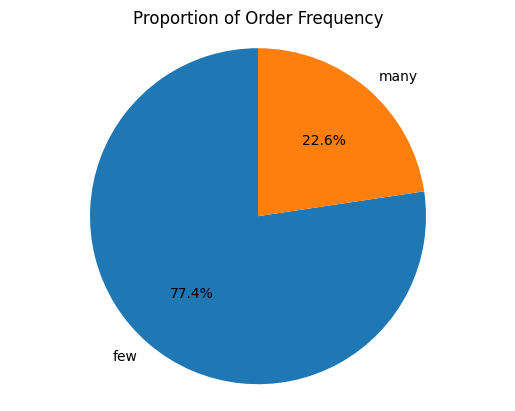

In [ ]:
import matplotlib.pyplot as plt

order_counts = df_gab['order_frequency'].value_counts()
plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Order Frequency')
plt.show()


In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 50 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

## Feature Month Buy

kolom 'most_buy_in_month' adalah bulan dengan jumlah pembelian tertinggi untuk setiap pelanggan. Ini berguna untuk mengidentifikasi bulan di mana pelanggan melakukan pembelian paling banyak

In [ ]:
# Hitung bulan dengan jumlah pembelian tertinggi untuk setiap pelanggan
month_buy = df_gab.groupby('customer_id')['order_month'].apply(lambda x: x.value_counts().idxmax())
month_buy = month_buy.reset_index()
month_buy.rename(columns={'order_month': 'most_buy_in_month'}, inplace=True)

# Gabungkan kolom month_buy ke dalam dataset df
df_gab = df_gab.merge(month_buy, on='customer_id', how='left')

In [ ]:
month_buy

customer_id  most_buy_in_month
0                3                  5
1                8                  2
2                9                  6
3               11                  3
4               15                  9
...            ...                ...
50700        99992                  9
50701        99995                 10
50702        99997                  4
50703        99998                  7
50704        99999                 10

[50705 rows x 2 columns]

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 51 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

## Feature most_buy_in_day

kolom 'most_buy_in_day' adalah hari dalam seminggu (0 hingga 6, di mana 0 adalah hari Minggu dan 6 adalah hari Sabtu) dengan jumlah pembelian tertinggi untuk setiap pelanggan. Ini membantu mengidentifikasi hari-hari dalam seminggu ketika pelanggan cenderung melakukan pembelian yang lebih banyak

In [ ]:
# Hitung hari dengan jumlah pembelian tertinggi untuk setiap pelanggan
day_buy = df_gab.groupby('customer_id')['order_day_of_week'].apply(lambda x: x.value_counts().idxmax())
day_buy = day_buy.reset_index()
day_buy.rename(columns={'order_day_of_week': 'most_buy_in_day'}, inplace=True)

# Gabungkan kolom day_buy ke dalam dataset df
df = df_gab.merge(day_buy, on='customer_id', how='left')

In [ ]:
day_buy

customer_id  most_buy_in_day
0                3                6
1                8                5
2                9                6
3               11                0
4               15                0
...            ...              ...
50700        99992                2
50701        99995                3
50702        99997                5
50703        99998                1
50704        99999                2

[50705 rows x 2 columns]

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 51 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

## Feature modus_parts_of_month_buy

kolom 'modus_parts_of_month_buy' yang mengindikasikan waktu tersering berdasarkan tanggal pembelian untuk setiap pelanggan. Ini kemudian dikelompokkan menjadi tiga kategori berdasarkan tanggal pembelian:

* 'awal bulan' jika tanggal pembelian kurang dari 10.
* 'pertengahan bulan' jika tanggal pembelian antara 10 dan 16.
* 'akhir bulan' jika tanggal pembelian lebih besar dari 16.

In [ ]:
# Waktu tersering berdasarkan tanggal
date_buy = df_gab.groupby('customer_id')['order_date'].max().reset_index()

def date_period(x):
    if x < 10:
        return 'beginning of the month'
    elif 10 <= x < 16:
        return 'mid of the month'
    else:
        return 'end of the month'

date_buy['modus_parts_of_month_buy'] = date_buy['order_date'].apply(date_period)
date_buy_counts = date_buy['modus_parts_of_month_buy'].value_counts()

# Memasukkan kolom modus_parts_of_month_buy ke dalam dataset df
df_gab = df_gab.merge(date_buy, on='customer_id', how='left')

In [ ]:
date_buy

customer_id  order_date modus_parts_of_month_buy
0                3          31         end of the month
1                8          30         end of the month
2                9          28         end of the month
3               11           7   beginning of the month
4               15          30         end of the month
...            ...         ...                      ...
50700        99992          30         end of the month
50701        99995          31         end of the month
50702        99997          25         end of the month
50703        99998          25         end of the month
50704        99999          12         mid of the month

[50705 rows x 3 columns]

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 53 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

## Feature modus_parts_of_day_buy

kolom 'modus_parts_of_day_buy' yang mengindikasikan waktu tersering melakukan order berdasarkan bagian hari (pagi, siang, sore, malam) untuk setiap pelanggan. Ini membagi waktu berdasarkan jam pembelian dan kemudian mengelompokkannya menjadi kategori:

* 'morning' (pagi) jika jam pembelian antara 5:00 dan 11:59.
* 'afternoon' (siang) jika jam pembelian antara 12:00 dan 16:59.
* 'evening' (sore) jika jam pembelian antara 17:00 dan 20:59.
* 'night' (malam) jika jam pembelian antara 21:00 dan 4:59 (keesokan harinya).

In [ ]:
#Waktu tersering melakukan order berdasarkan bagian hari
pod_buy = df_gab.groupby(['customer_id'])['order_hour'].max(df['order_hour'].count())
pod_buy = pd.DataFrame(data = pod_buy).reset_index()

def pod(x):
    if (x >= 5) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 17):
        return 'afternoon'
    elif (x >= 17) & (x < 21):
        return 'evening'
    else:
        return 'night'
pod_buy['modus_parts_of_day_buy'] = pod_buy['order_hour'].apply(pod)
pod_buy['modus_parts_of_day_buy'].value_counts()
# Gabungkan dengan DataFrame df
df_gab = df_gab.merge(pod_buy, on='customer_id', how='left')

In [ ]:
pod_buy

customer_id  order_hour modus_parts_of_day_buy
0                3          23                  night
1                8          22                  night
2                9           8                morning
3               11          14              afternoon
4               15           6                morning
...            ...         ...                    ...
50700        99992          23                  night
50701        99995          23                  night
50702        99997          18                evening
50703        99998          22                  night
50704        99999          19                evening

[50705 rows x 3 columns]

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

`karena hasilnya jadi ada x,y jadi digabungkan`

In [ ]:
# Gabungkan kolom 'order_date_x' dan 'order_date_y'
df_gab['order_date_x'].fillna(df_gab['order_date_y'], inplace=True)

# Gabungkan kolom 'order_hour_x' dan 'order_hour_y'
df_gab['order_hour_x'].fillna(df_gab['order_hour_y'], inplace=True)

# Hapus kolom 'order_date_y' dan 'order_hour_y'
df_gab.drop(['order_date_y', 'order_hour_y'], axis=1, inplace=True)

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 53 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

## Feature value_type

In [ ]:
#Rata-rata total order value per order
avg_order_value = df_gab.groupby('customer_id')['total_amount'].mean().reset_index()
avg_order_value = pd.DataFrame(data = avg_order_value).rename(columns = {'total_amount' : 'avg_value_per_order'})

In [ ]:
avg_order_value

customer_id  avg_value_per_order
0                3        416978.215686
1                8        556937.285714
2                9        439777.500000
3               11        197533.000000
4               15        426974.000000
...            ...                  ...
50700        99992        362685.750000
50701        99995        600729.050000
50702        99997        226461.000000
50703        99998        836567.500000
50704        99999        196111.000000

[50705 rows x 2 columns]

In [ ]:
# Mengecek nilai unik
unique_avg_value_per_order = avg_order_value['avg_value_per_order'].unique()
print("Nilai unik avg_value_per_order:", unique_avg_value_per_order)

# Mengecek nilai minimum dan maksimum
min_avg_value_per_order = avg_order_value['avg_value_per_order'].min()
max_avg_value_per_order = avg_order_value['avg_value_per_order'].max()

print("Nilai minimum avg_value_per_order:", min_avg_value_per_order)
print("Nilai maksimum avg_value_per_order:", max_avg_value_per_order)

Nilai unik avg_value_per_order: [416978.21568627 556937.28571429 439777.5        ... 226461.
 836567.5        196111.        ]
Nilai minimum avg_value_per_order: 27450.0
Nilai maksimum avg_value_per_order: 13904505.0


In [ ]:
#Buat kolom yang mengelompokan rata-rata harga order tiap pelanggan
def value(x):
    if x >= 500000:
        return 'expensive'
    elif (x < 500000) & (x > 100000):
        return 'normal'
    else:
        return 'cheap'
#Asumsi = harga diatas 500ribu disebut mahal, harga diantara 100ribu - 500ribu disebut normal, harga dibawah 100ribu disebut murah

avg_order_value['value_type'] = avg_order_value['avg_value_per_order'].apply(value)

df_gab = df_gab.merge(avg_order_value, on='customer_id', how='left')

In [ ]:
avg_order_value

customer_id  avg_value_per_order value_type
0                3        416978.215686     normal
1                8        556937.285714  expensive
2                9        439777.500000     normal
3               11        197533.000000     normal
4               15        426974.000000     normal
...            ...                  ...        ...
50700        99992        362685.750000     normal
50701        99995        600729.050000  expensive
50702        99997        226461.000000     normal
50703        99998        836567.500000  expensive
50704        99999        196111.000000     normal

[50705 rows x 3 columns]

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

### Visualisasi value_type

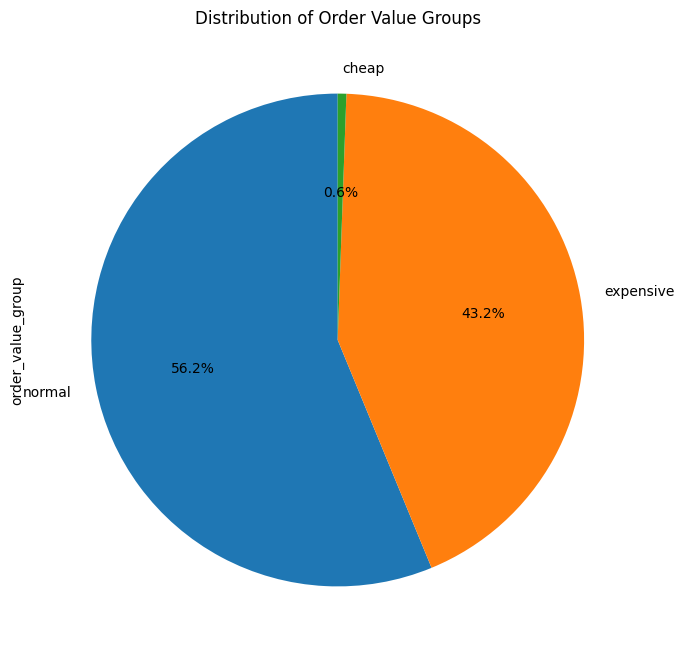

In [ ]:
# Membuat kolom baru 'order_value_group'
avg_order_value['order_value_group'] = avg_order_value['avg_value_per_order'].apply(value)

# Visualisasi distribusi grup nilai pesanan
order_value_group_counts = avg_order_value['order_value_group'].value_counts()

# Plot grafik pie
plt.figure(figsize=(8, 8))
order_value_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Order Value Groups')
plt.show()

## Feature activity_status

kolom 'activity_status' pada DataFrame 'purchase_date', yang menggambarkan keaktifan pelanggan berdasarkan rata-rata hari per satu order.

* Jika rata-rata hari per satu order di antara 1 dan 120, maka pelanggan dianggap 'active'.
* Jika rata-rata hari per satu order lebih dari 120, pelanggan dianggap 'passive I'.
* Jika nilai rata-rata hari per satu order adalah 0, pelanggan dianggap 'passive II' karena hanya melakukan satu kali order.

In [ ]:
avg_days_1_order_column = df_gab['avg_days_1_order']
avg_days_1_order_column

0           0.000000
1          45.451613
2          45.451613
3          45.451613
4          45.451613
             ...    
852579    156.500000
852580      0.000000
852581      0.000000
852582      0.000000
852583      0.000000
Name: avg_days_1_order, Length: 852584, dtype: float64

In [ ]:
#Buat kolom keaktifan pelanggan
def activity(x):
    if (x <= 120) & (x >= 1):
        return 'active'
    elif x > 120:
        return 'passive I'
    else:
        return 'passive II'
#Asumsi : semakin kecil rata-rata hari per 1 order maka semakin aktif pelanggan tersebut (active) dan sebaliknya (passive I)
#Namun jika nilai rata-rata hari per 1 order adalah 0, maka pelanggan tersebut hanya melakukan 1 kali order saja (passive II)

purchase_date['activity_status'] = purchase_date['avg_days_1_order'].apply(activity)
# Merge kolom 'activity_status' ke dalam DataFrame 'df'
df_gab = df_gab.merge(purchase_date[['customer_id', 'activity_status']], on='customer_id', how='left')

In [ ]:
purchase_date

customer_id              first_purchase_date  \
0                3 2018-08-25 18:54:03.844494+00:00   
1                8 2021-02-13 09:47:39.656991+00:00   
2                9 2021-06-27 01:51:48.421034+00:00   
3               11 2022-03-07 14:29:13.759159+00:00   
4               15 2019-09-30 04:47:36.105040+00:00   
...            ...                              ...   
50700        99992 2020-06-30 21:03:37.873510+00:00   
50701        99995 2020-08-19 09:50:48.810263+00:00   
50702        99997 2020-04-25 18:38:16.825127+00:00   
50703        99998 2018-07-02 20:56:19.703960+00:00   
50704        99999 2016-10-12 19:22:21.166237+00:00   

                    last_purchase_date  total_transaction order_frequency  \
0     2022-06-26 15:41:52.844494+00:00                 51             few   
1     2022-05-15 22:46:22.656991+00:00                  7             few   
2     2022-05-28 08:44:32.421034+00:00                  6             few   
3     2022-03-07 14:29:13.759159+00:00                  1             few   
4     2022-01-05 06:07:58.105040+00:00                  5             few   
...                                ...                ...             ...   
50700 2022-05-25 09:32:49.873510+00:00                 12             few   
50701 2022-07-29 03:54:17.810263+00:00                 60             few   
50702 2020-04-25 18:38:16.825127+00:00                  1             few   
50703 2022-01-25 00:54:09.703960+00:00                  8             few   
50704 2016-10-12 19:22:21.166237+00:00                  1             few   

       promo_use  promo_use_in_%  delta_last_first  avg_days_1_order  \
0             26           50.98              1400         27.450980   
1              1           14.29               456         65.142857   
2              0            0.00               335         55.833333   
3              1          100.00                 0          0.000000   
4              4           80.00               828        165.600000   
...          ...             ...               ...               ...   
50700          2           16.67               693         57.750000   
50701         13           21.67               708         11.800000   
50702          0            0.00                 0          0.000000   
50703          6           75.00              1302        162.750000   
50704          0            0.00                 0          0.000000   

      activity_status  
0              active  
1              active  
2              active  
3          passive II  
4           passive I  
...               ...  
50700          active  
50701          active  
50702      passive II  
50703       passive I  
50704      passive II  

[50705 rows x 10 columns]

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 56 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

### Visualisasi activity status

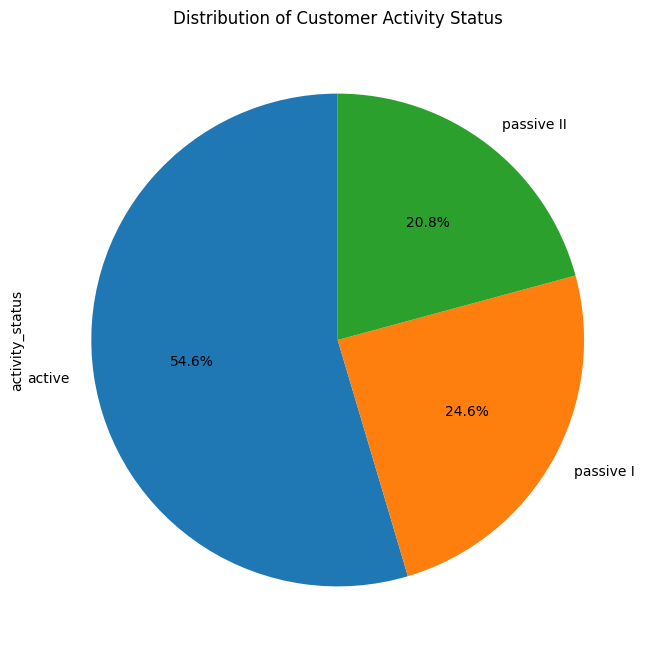

In [ ]:
# Visualisasi distribusi keaktifan pelanggan
activity_counts = purchase_date['activity_status'].value_counts()

# Plot grafik pie
plt.figure(figsize=(8, 8))
activity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Activity Status')
plt.show()


## Feature total_order_value

kolom 'total_order_value' yang mencerminkan total nilai pesanan yang telah dilakukan oleh masing-masing pelanggan.

In [ ]:
total_order_amount = df_gab.groupby('customer_id')['total_amount'].sum().reset_index().rename(columns = {'total_amount' :
                                                                                                      'total_order_value'})
df_gab = df_gab.merge(total_order_amount, on='customer_id', how='left')

In [ ]:
total_order_amount

customer_id  total_order_value
0                3           21265889
1                8            3898561
2                9            2638665
3               11             197533
4               15            2134870
...            ...                ...
50700        99992            4352229
50701        99995           36043743
50702        99997             226461
50703        99998            6692540
50704        99999             196111

[50705 rows x 2 columns]

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 57 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

## Feaure preferred_payment_type

'preferred_payment_type' yang menginformasikan preferensi tipe pembayaran untuk setiap pelanggan berdasarkan metode pembayaran yang paling sering digunakan oleh pelanggan tersebut

In [ ]:
#Buat tabel yang menginfokan preferensi tipe pembayaran tiap pelanggan
top_payment_type = df_gab.groupby(['customer_id'])['payment_method'].max(df['payment_method'].value_counts().argmax()).reset_index()
top_payment_type = pd.DataFrame(data = top_payment_type).rename(columns = {'payment_method':'preferred_payment_type'}).sort_values(by = 'preferred_payment_type', ascending = False)
top_payment_type['preferred_payment_type'].value_counts()

df_gab = df_gab.merge(top_payment_type, on='customer_id', how='left')

In [ ]:
top_payment_type

customer_id preferred_payment_type
0                3                    OVO
35792        70434                    OVO
35781        70415                    OVO
17888        34939                    OVO
17887        34936                    OVO
...            ...                    ...
23460        45963            Credit Card
19925        38866            Credit Card
31145        61160            Credit Card
13251        25810            Credit Card
13873        27096            Credit Card

[50705 rows x 2 columns]

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 58 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

### Visualisasi metode pembayaran terpopuler

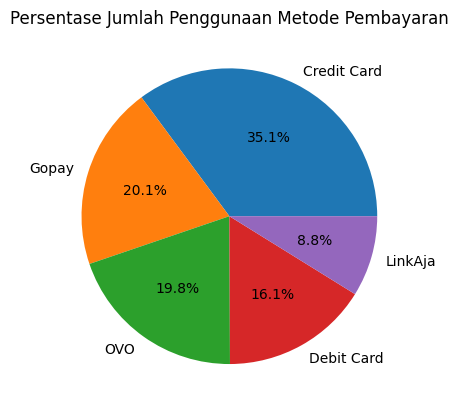

In [ ]:
#Visualisasi metode pembayaran terpopuler
payment_type = df_gab.groupby('payment_method')['order_created_at'].count().reset_index()
payment_type = payment_type.rename(columns = {'order_created_at':'total_order'}
                                  ).sort_values(by = 'total_order', ascending = False)

plt.pie(x = payment_type['total_order'], labels = payment_type['payment_method'], autopct='%1.1f%%')
plt.title('Persentase Jumlah Penggunaan Metode Pembayaran')
plt.show()

## Membuat label Churn

* Kita punya kolom 'first_purchase_date' yang menyimpan tanggal pertama kali pelanggan melakukan pembelian.

* terus, kita menambahkan 12 bulan ke 'first_purchase_date' untuk setiap pelanggan.

* Hasilnya adalah kolom baru yang kita sebut 'churn_threshold', yang berisi tanggal 3 bulan setelah pelanggan pertama kali melakukan pembelian.

* Tujuan dari menentukan tanggal 'churn_threshold' adalah untuk memeriksa apakah pelanggan sudah tidak melakukan pembelian lagi setelah 12 bulan.

* Pelanggan yang tidak melakukan pembelian lagi dalam rentang waktu ini dianggap sebagai pelanggan yang "churn

In [ ]:
import pandas as pd
from datetime import datetime
from pytz import UTC

# Konversi tanggal ke tipe datetime jika belum
df_gab['last_purchase_date'] = pd.to_datetime(df_gab['last_purchase_date'])
df_gab['first_purchase_date'] = pd.to_datetime(df_gab['first_purchase_date'])

# Tentukan tanggal 1 tahun setelah pelanggan berbelanja pertama
df_gab['churn_threshold'] = df_gab['first_purchase_date'] + pd.DateOffset(months=12)

# Hitung selisih antara tanggal terakhir pembelian dan tanggal churn_threshold
df_gab['churn_period'] = (df_gab['last_purchase_date'] - df_gab['churn_threshold']).dt.days

# Buat kolom label churn
df_gab['churn'] = (df_gab['churn_period'] < 1).astype(int)  # Mengubah logika disini

# Ubah tipe data kolom churn menjadi integer (1 untuk churn, 0 untuk tidak churn)
df_gab['churn'] = df_gab['churn'].astype(int)

# Hapus kolom churn_threshold dan churn_period jika tidak diperlukan lagi
# df_gab.drop(columns=['churn_threshold', 'churn_period'], inplace=True)

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 61 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

In [ ]:
print(df_gab['churn'].value_counts())

0    748816
1    103768
Name: churn, dtype: int64


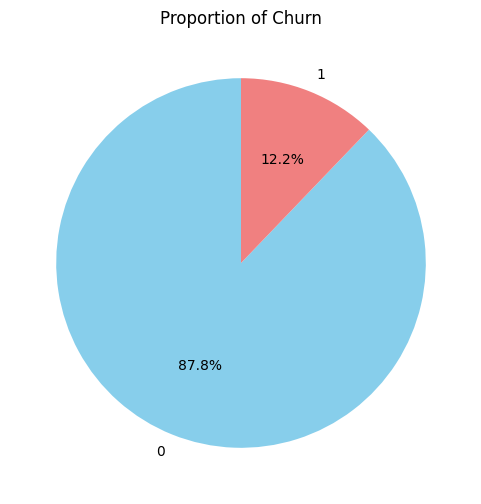

In [ ]:
import matplotlib.pyplot as plt

# Hitung proporsi churn dan tidak churn
churn_counts = df_gab['churn'].value_counts()

# Buat diagram lingkaran
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Churn')
plt.show()


In [ ]:
df_gab[['customer_id','first_purchase_date', 'last_purchase_date', 'churn_threshold', 'churn_period','churn']]

customer_id              first_purchase_date  \
0              5868 2018-07-29 15:22:01.458193+00:00   
1              4774 2018-07-30 12:40:22.365620+00:00   
2              4774 2018-07-30 12:40:22.365620+00:00   
3              4774 2018-07-30 12:40:22.365620+00:00   
4              4774 2018-07-30 12:40:22.365620+00:00   
...             ...                              ...   
852579        25121 2020-11-12 18:19:20.074873+00:00   
852580        34829 2021-12-09 07:35:18.222046+00:00   
852581        99645 2021-12-11 01:20:36.944593+00:00   
852582        87319 2019-12-18 11:01:09.623382+00:00   
852583        58180 2019-12-19 12:47:14.701215+00:00   

                     last_purchase_date                  churn_threshold  \
0      2018-07-29 15:22:01.458193+00:00 2019-07-29 15:22:01.458193+00:00   
1      2022-06-09 12:18:09.365620+00:00 2019-07-30 12:40:22.365620+00:00   
2      2022-06-09 12:18:09.365620+00:00 2019-07-30 12:40:22.365620+00:00   
3      2022-06-09 12:18:09.365620+00:00 2019-07-30 12:40:22.365620+00:00   
4      2022-06-09 12:18:09.365620+00:00 2019-07-30 12:40:22.365620+00:00   
...                                 ...                              ...   
852579 2021-09-21 22:10:05.074873+00:00 2021-11-12 18:19:20.074873+00:00   
852580 2021-12-09 07:35:18.222046+00:00 2022-12-09 07:35:18.222046+00:00   
852581 2021-12-11 01:20:36.944593+00:00 2022-12-11 01:20:36.944593+00:00   
852582 2019-12-18 11:01:09.623382+00:00 2020-12-18 11:01:09.623382+00:00   
852583 2019-12-19 12:47:14.701215+00:00 2020-12-19 12:47:14.701215+00:00   

        churn_period  churn  
0               -365      1  
1               1044      0  
2               1044      0  
3               1044      0  
4               1044      0  
...              ...    ...  
852579           -52      1  
852580          -365      1  
852581          -365      1  
852582          -366      1  
852583          -366      1  

[852584 rows x 6 columns]

# Insight df_gabungan -- Customer dan Transaksi

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 61 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

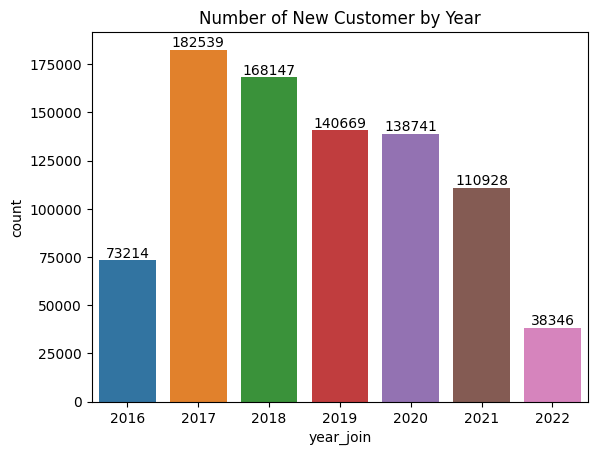

In [ ]:
# Mengkonversi kolom 'first_join_date' ke objek datetime
df_gab['first_join_date'] = pd.to_datetime(df_gab['first_join_date'])

# Mengambil tahun dari kolom 'first_join_date'
df_gab['year_join'] = df_gab['first_join_date'].dt.year

# Mengatur palet warna dengan palet "tab10" yang berwarna-warni
palette = sns.color_palette("tab10", n_colors=len(df_gab['year_join'].unique()))

# Membuat plot
fig, ax = plt.subplots()
sns.countplot(data=df_gab, x='year_join', ax=ax, palette=palette)
for content in ax.containers:
    ax.bar_label(content)
plt.title('Number of New Customer by Year')
plt.savefig('Number_of_New_Customer_by_Year.png')
plt.show()

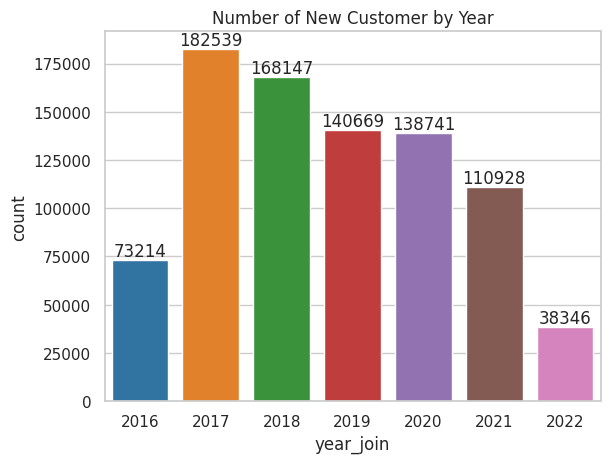

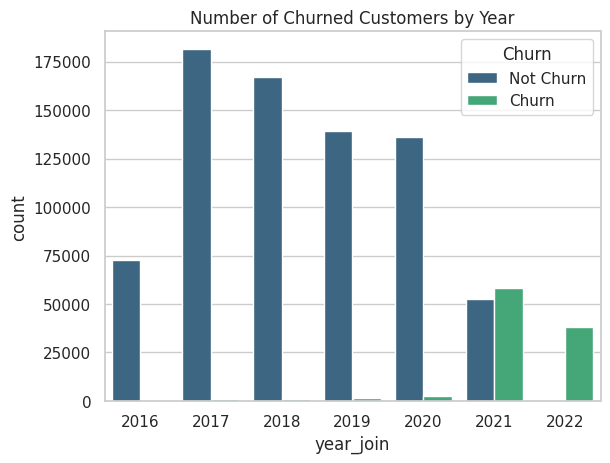

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengkonversi kolom 'first_join_date' ke objek datetime
df_gab['first_join_date'] = pd.to_datetime(df_gab['first_join_date'])

# Mengambil tahun dari kolom 'first_join_date'
df_gab['year_join'] = df_gab['first_join_date'].dt.year

# Mengatur palet warna dengan palet "tab10" yang berwarna-warni
palette = sns.color_palette("tab10", n_colors=len(df_gab['year_join'].unique()))

# Membuat plot untuk jumlah pelanggan baru berdasarkan tahun bergabung
fig, ax = plt.subplots()
sns.countplot(data=df_gab, x='year_join', ax=ax, palette=palette)
for content in ax.containers:
    ax.bar_label(content)
plt.title('Number of New Customer by Year')
plt.savefig('Number_of_New_Customer_by_Year.png')
plt.show()

# Membuat plot untuk jumlah churn berdasarkan tahun
fig, ax = plt.subplots()
sns.countplot(data=df_gab, x='year_join', hue='churn', ax=ax, palette='viridis')
plt.title('Number of Churned Customers by Year')
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.savefig('Number_of_Churned_Customers_by_Year.png')
plt.show()


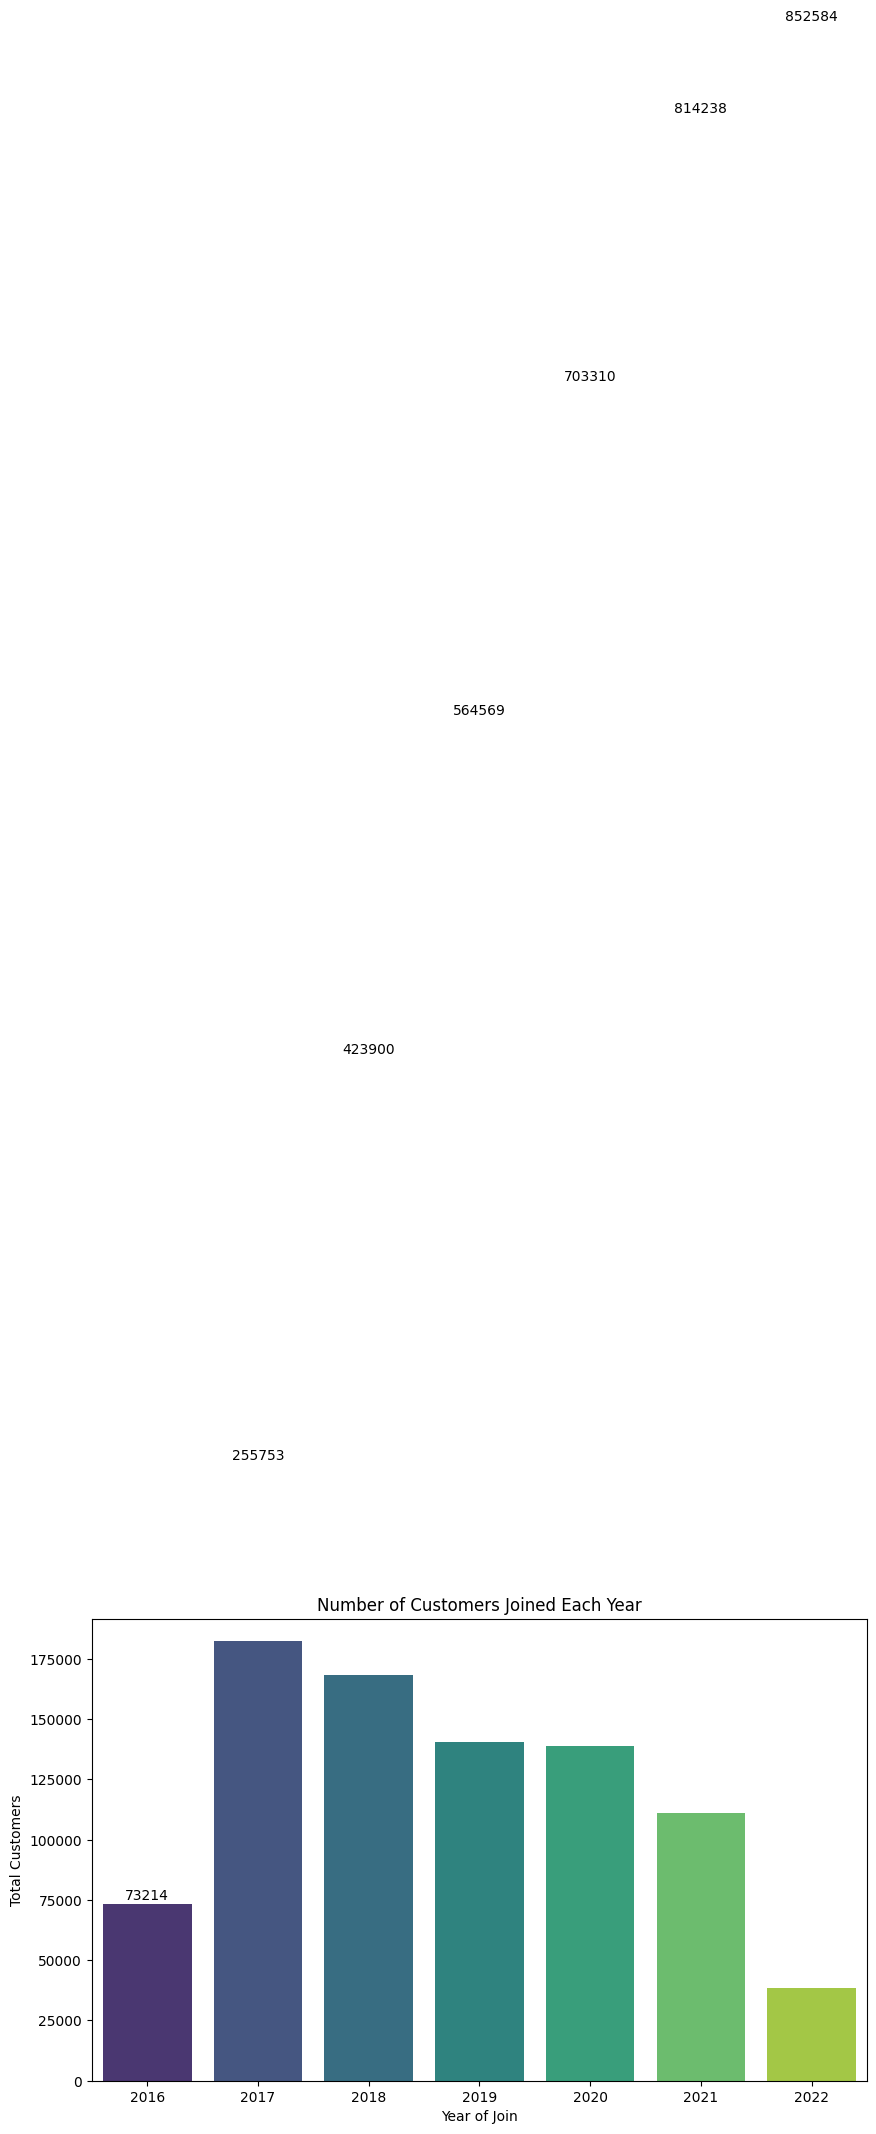

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df'

# Extracting the year from the 'first_join_date' column
df_gab['year_join'] = df_gab['first_join_date'].dt.year

# Grouping by 'year_join' and counting the number of customers for each year
tot_cust = df_gab.groupby('year_join').size().reset_index(name='total_of_year')

# Calculating the cumulative sum of total customers
tot_cust['cumulative_total'] = tot_cust['total_of_year'].cumsum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='year_join', y='total_of_year', data=tot_cust, palette='viridis')

# Adding annotations for cumulative total
for index, value in enumerate(tot_cust['cumulative_total']):
    ax.text(index, value + 0.001 * max(tot_cust['cumulative_total']), str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Number of Customers Joined Each Year')
plt.xlabel('Year of Join')
plt.ylabel('Total Customers')
plt.show()


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Extracting the year from the 'first_join_date' column
df_gab['year_join'] = df_gab['first_join_date'].dt.year

# Grouping by 'year_join' and counting the number of customers for each year
tot_cust = df_gab.groupby('year_join').size().reset_index(name='total_of_year')

# Calculating the cumulative sum of total customers
tot_cust['cumulative_total'] = tot_cust['total_of_year'].cumsum()

# Displaying the table with total customers and cumulative total
total_customer = tot_cust[['year_join', 'total_of_year', 'cumulative_total']].rename(
    columns={'year_join': 'Year of Join', 'total_of_year': 'Total Customers', 'cumulative_total': 'Cumulative Total'}
)

print(total_customer)

   Year of Join  Total Customers  Cumulative Total
0          2016            73214             73214
1          2017           182539            255753
2          2018           168147            423900
3          2019           140669            564569
4          2020           138741            703310
5          2021           110928            814238
6          2022            38346            852584


In [ ]:
df_gab.isnull().sum()

order_created_at          0
customer_id               0
booking_id                0
session_id                0
payment_method            0
                         ..
total_order_value         0
preferred_payment_type    0
churn_threshold           0
churn_period              0
churn                     0
Length: 61, dtype: int64

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 61 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   order_created_at                  852584 non-null  datetime64[ns, UTC]
 1   customer_id                       852584 non-null  int64              
 2   booking_id                        852584 non-null  object             
 3   session_id                        852584 non-null  object             
 4   payment_method                    852584 non-null  object             
 5   payment_status                    852584 non-null  object             
 6   promo_amount                      852584 non-null  int64              
 7   promo_code                        326536 non-null  object             
 8   shipment_fee                      852584 non-null  int64              
 9   shipment_date_limit               852584 non-nul

In [ ]:
df_gab.to_csv('final_dataset.csv', index=False)



---



---



# MODELLING

## load dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Understanding

In [ ]:
# Memuat dataset CSV ke dalam DataFrame
dataset = pd.read_csv('/content/drive/MyDrive/final_dataset.csv')

In [ ]:
dataset.head()

order_created_at  customer_id  \
0  2018-07-29 15:22:01.458193+00:00         5868   
1  2018-07-30 12:40:22.365620+00:00         4774   
2  2018-09-15 11:51:17.365620+00:00         4774   
3  2018-11-01 11:23:48.365620+00:00         4774   
4  2018-12-18 11:20:30.365620+00:00         4774   

                             booking_id                            session_id  \
0  186e2bee-0637-4710-8981-50c2d737bc42  3abaa6ce-e320-4e51-9469-d9f3fa328e86   
1  caadb57b-e808-4f94-9e96-8a7d4c9898db  2ee5ead1-f13e-4759-92df-7ff48475e970   
2  6000fffb-9c1a-4f4a-9296-bc8f6b622b50  93325fb6-eb00-4268-bb0e-6471795a0ad0   
3  f5e530a7-4350-4cd1-a3bc-525b5037bcab  bcad5a61-1b67-448d-8ff4-781d67bc56e4   
4  0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2  df1042ab-13e6-4072-b9d2-64a81974c51a   

  payment_method payment_status  promo_amount   promo_code  shipment_fee  \
0     Debit Card        Success          1415  WEEKENDSERU         10000   
1    Credit Card        Success             0          NaN         10000   
2            OVO        Success             0          NaN         10000   
3    Credit Card        Success             0          NaN             0   
4    Credit Card        Success             0          NaN             0   

           shipment_date_limit  ...  modus_parts_of_month_buy  \
0  2018-08-03T05:07:24.812676Z  ...          end of the month   
1  2018-08-03T01:29:03.415705Z  ...          end of the month   
2  2018-09-18T08:41:49.422380Z  ...          end of the month   
3  2018-11-05T17:42:27.954235Z  ...          end of the month   
4  2018-12-23T17:24:07.361785Z  ...          end of the month   

   modus_parts_of_day_buy  avg_value_per_order  value_type  activity_status  \
0               afternoon        199832.000000      normal       passive II   
1               afternoon        485119.419355      normal           active   
2               afternoon        485119.419355      normal           active   
3               afternoon        485119.419355      normal           active   
4               afternoon        485119.419355      normal           active   

   total_order_value preferred_payment_type                   churn_threshold  \
0             199832             Debit Card  2019-07-29 15:22:01.458193+00:00   
1           15038702                    OVO  2019-07-30 12:40:22.365620+00:00   
2           15038702                    OVO  2019-07-30 12:40:22.365620+00:00   
3           15038702                    OVO  2019-07-30 12:40:22.365620+00:00   
4           15038702                    OVO  2019-07-30 12:40:22.365620+00:00   

  churn_period churn  
0         -365     1  
1         1044     0  
2         1044     0  
3         1044     0  
4         1044     0  

[5 rows x 61 columns]

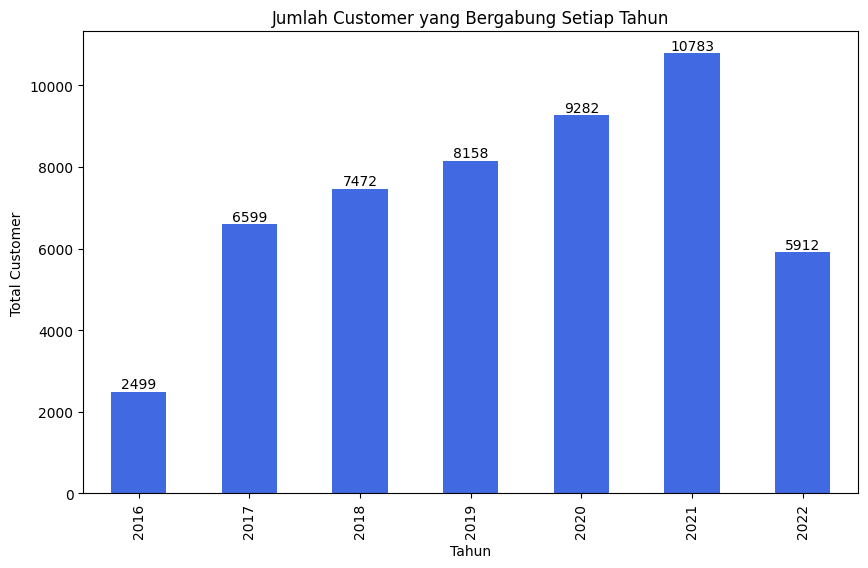

In [ ]:
# Visualisasi total customer setiap tahunnya
plt.figure(figsize=(10, 6))
total_customer = dataset.groupby('year_join')['customer_id'].nunique()
bars = total_customer.plot(kind='bar', color='royalblue')  # Mengganti warna menjadi royalblue
plt.title('Jumlah Customer yang Bergabung Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Customer')

# Menambahkan label angka di atas setiap batang bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.show()



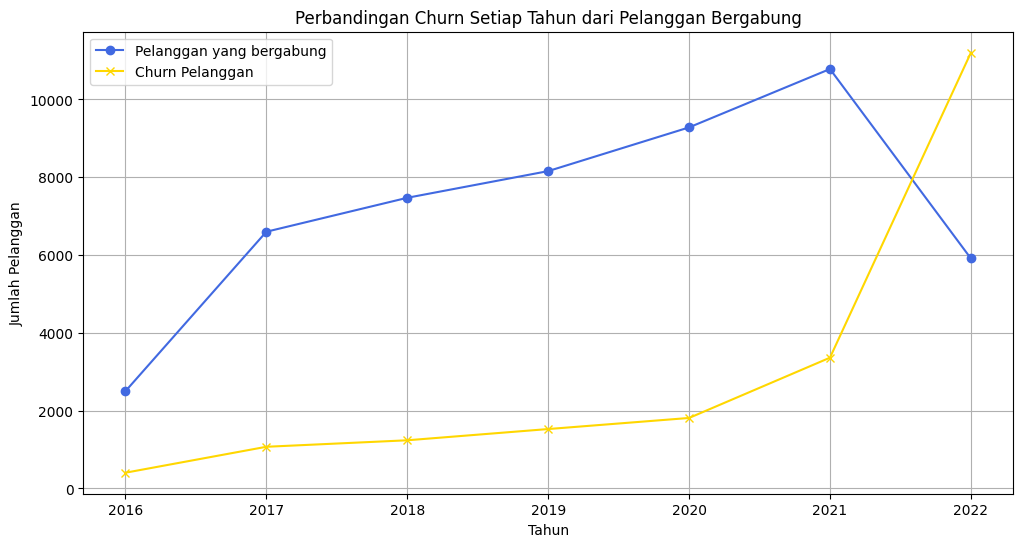

In [ ]:
# Membuat kolom baru 'churn_year' untuk menyimpan tahun churn
dataset['churn_year'] = dataset['last_purchase_date'].apply(lambda x: pd.to_datetime(x).year if x != 'Not Purchased' else 0)

# Visualisasi perbandingan churn setiap tahun dari total pelanggan setiap tahunnya
plt.figure(figsize=(12, 6))

# Menghitung jumlah pelanggan dan churn setiap tahun
total_customers = dataset.groupby('year_join')['customer_id'].nunique()
churned_customers = dataset[dataset['churn'] == 1].groupby('churn_year')['customer_id'].nunique()

# Plotting jumlah pelanggan dengan warna biru tua
total_customers.plot(label='Pelanggan yang bergabung', marker='o', color='royalblue')

# Plotting jumlah churn dengan warna kuning tua
churned_customers.plot(label='Churn Pelanggan', marker='x', color='gold')

# Menambahkan label dan judul
plt.title('Perbandingan Churn Setiap Tahun dari Pelanggan Bergabung')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pelanggan')
plt.legend()
plt.grid(True)
plt.show()


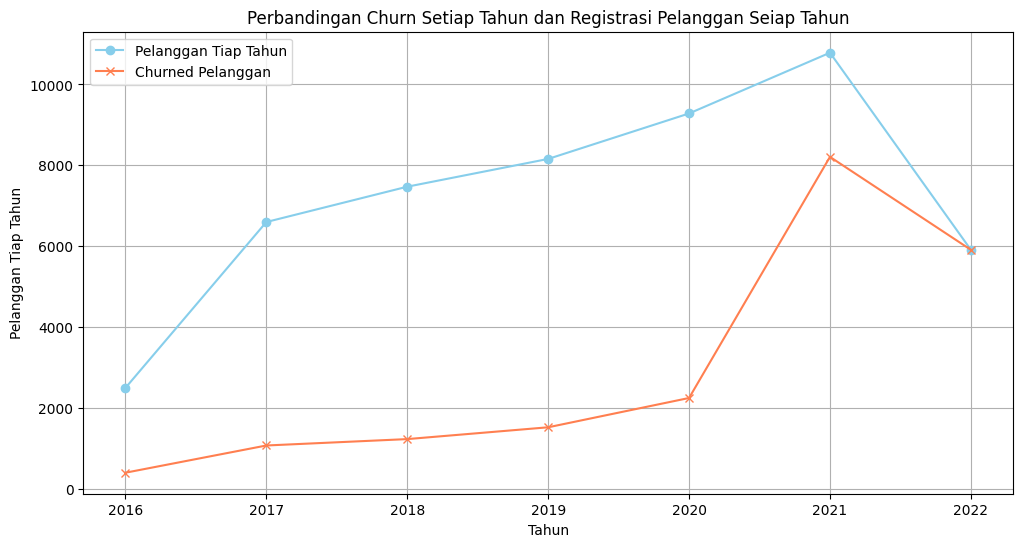

In [ ]:
# Membuat kolom baru 'churn_year' untuk menyimpan tahun churn
dataset['churn_year'] = dataset['last_purchase_date'].apply(lambda x: pd.to_datetime(x).year if x != 'Not Purchased' else 0)

# Visualisasi perbandingan churn setiap tahun dari total pelanggan setiap tahunnya
plt.figure(figsize=(12, 6))

# Menghitung jumlah pelanggan dan churn setiap tahun
customers = dataset.groupby('year_join')['customer_id'].nunique()
churned_customers = dataset[dataset['churn'] == 1].groupby('year_join')['customer_id'].nunique()

# Plotting pelanggan
customers.plot(label='Pelanggan Tiap Tahun', marker='o', color='skyblue')

# Plotting jumlah churn
churned_customers.plot(label='Churned Pelanggan', marker='x', color='coral')

# Menambahkan label dan judul
plt.title('Perbandingan Churn Setiap Tahun dan Registrasi Pelanggan Seiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Pelanggan Tiap Tahun')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Filter data untuk tahun 2022
df_2022 = dataset[dataset['year_join'] == 2022]

# Tampilkan data customer di tahun 2022 dan status churn
df_2022[['customer_id', 'churn']]

customer_id  churn
477749        66996      1
477797        92226      1
477798        80891      1
477804        98148      1
477815        84824      1
...             ...    ...
852526        97889      1
852527        67920      1
852528        67945      1
852551        62721      1
852573        99675      1

[5912 rows x 2 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 61 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   order_created_at                  852584 non-null  object 
 1   customer_id                       852584 non-null  int64  
 2   booking_id                        852584 non-null  object 
 3   session_id                        852584 non-null  object 
 4   payment_method                    852584 non-null  object 
 5   payment_status                    852584 non-null  object 
 6   promo_amount                      852584 non-null  int64  
 7   promo_code                        326536 non-null  object 
 8   shipment_fee                      852584 non-null  int64  
 9   shipment_date_limit               852584 non-null  object 
 10  shipment_location_lat             852584 non-null  float64
 11  shipment_location_long            852584 non-null  f

In [ ]:
dataset[['customer_id','first_purchase_date', 'last_purchase_date', 'churn_threshold', 'churn_period','churn']]

customer_id               first_purchase_date  \
0              5868  2018-07-29 15:22:01.458193+00:00   
1              4774  2018-07-30 12:40:22.365620+00:00   
2              4774  2018-07-30 12:40:22.365620+00:00   
3              4774  2018-07-30 12:40:22.365620+00:00   
4              4774  2018-07-30 12:40:22.365620+00:00   
...             ...                               ...   
852579        25121  2020-11-12 18:19:20.074873+00:00   
852580        34829  2021-12-09 07:35:18.222046+00:00   
852581        99645  2021-12-11 01:20:36.944593+00:00   
852582        87319  2019-12-18 11:01:09.623382+00:00   
852583        58180  2019-12-19 12:47:14.701215+00:00   

                      last_purchase_date                   churn_threshold  \
0       2018-07-29 15:22:01.458193+00:00  2019-07-29 15:22:01.458193+00:00   
1       2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
2       2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
3       2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
4       2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
...                                  ...                               ...   
852579  2021-09-21 22:10:05.074873+00:00  2021-11-12 18:19:20.074873+00:00   
852580  2021-12-09 07:35:18.222046+00:00  2022-12-09 07:35:18.222046+00:00   
852581  2021-12-11 01:20:36.944593+00:00  2022-12-11 01:20:36.944593+00:00   
852582  2019-12-18 11:01:09.623382+00:00  2020-12-18 11:01:09.623382+00:00   
852583  2019-12-19 12:47:14.701215+00:00  2020-12-19 12:47:14.701215+00:00   

        churn_period  churn  
0               -365      1  
1               1044      0  
2               1044      0  
3               1044      0  
4               1044      0  
...              ...    ...  
852579           -52      1  
852580          -365      1  
852581          -365      1  
852582          -366      1  
852583          -366      1  

[852584 rows x 6 columns]

In [ ]:
import pandas as pd

# Ambil subset dataset yang dibutuhkan
subset_columns = ['customer_id', 'first_purchase_date', 'last_purchase_date', 'churn_threshold', 'churn_period', 'churn']
subset_df = dataset[subset_columns]

# Ubah kolom first_purchase_date dan last_purchase_date ke dalam format datetime
subset_df['first_purchase_date'] = pd.to_datetime(subset_df['first_purchase_date'])
subset_df['last_purchase_date'] = pd.to_datetime(subset_df['last_purchase_date'])

# Filter untuk customer dengan customer_id 4774
customer_subset = subset_df[subset_df['customer_id'] == 4774]

# Tampilkan subset dataset untuk customer dengan customer_id 4774
customer_subset

<ipython-input-4-4f969c476841>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['first_purchase_date'] = pd.to_datetime(subset_df['first_purchase_date'])
<ipython-input-4-4f969c476841>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['last_purchase_date'] = pd.to_datetime(subset_df['last_purchase_date'])


customer_id              first_purchase_date  \
1          4774 2018-07-30 12:40:22.365620+00:00   
2          4774 2018-07-30 12:40:22.365620+00:00   
3          4774 2018-07-30 12:40:22.365620+00:00   
4          4774 2018-07-30 12:40:22.365620+00:00   
5          4774 2018-07-30 12:40:22.365620+00:00   
6          4774 2018-07-30 12:40:22.365620+00:00   
7          4774 2018-07-30 12:40:22.365620+00:00   
8          4774 2018-07-30 12:40:22.365620+00:00   
9          4774 2018-07-30 12:40:22.365620+00:00   
10         4774 2018-07-30 12:40:22.365620+00:00   
11         4774 2018-07-30 12:40:22.365620+00:00   
12         4774 2018-07-30 12:40:22.365620+00:00   
13         4774 2018-07-30 12:40:22.365620+00:00   
14         4774 2018-07-30 12:40:22.365620+00:00   
15         4774 2018-07-30 12:40:22.365620+00:00   
16         4774 2018-07-30 12:40:22.365620+00:00   
17         4774 2018-07-30 12:40:22.365620+00:00   
18         4774 2018-07-30 12:40:22.365620+00:00   
19         4774 2018-07-30 12:40:22.365620+00:00   
20         4774 2018-07-30 12:40:22.365620+00:00   
21         4774 2018-07-30 12:40:22.365620+00:00   
22         4774 2018-07-30 12:40:22.365620+00:00   
23         4774 2018-07-30 12:40:22.365620+00:00   
24         4774 2018-07-30 12:40:22.365620+00:00   
25         4774 2018-07-30 12:40:22.365620+00:00   
26         4774 2018-07-30 12:40:22.365620+00:00   
27         4774 2018-07-30 12:40:22.365620+00:00   
28         4774 2018-07-30 12:40:22.365620+00:00   
29         4774 2018-07-30 12:40:22.365620+00:00   
30         4774 2018-07-30 12:40:22.365620+00:00   
31         4774 2018-07-30 12:40:22.365620+00:00   

                 last_purchase_date                   churn_threshold  \
1  2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
2  2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
3  2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
4  2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
5  2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
6  2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
7  2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
8  2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
9  2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
10 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
11 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
12 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
13 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
14 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
15 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
16 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
17 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
18 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
19 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
20 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
21 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
22 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
23 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
24 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
25 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
26 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
27 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
28 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
29 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
30 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   
31 2022-06-09 12:18:09.365620+00:00  2019-07-30 12:40:22.365620+00:00   

  

In [ ]:
# Asumsikan dataset memiliki kolom 'order_created_at'
subset_columns = ['customer_id', 'order_created_at']
subset_df = dataset[subset_columns]

# Filter untuk customer dengan customer_id 4774
customer_subset = subset_df[subset_df['customer_id'] == 4774]

# Tampilkan subset dataset untuk customer dengan customer_id 4774
customer_subset


customer_id                  order_created_at
1          4774  2018-07-30 12:40:22.365620+00:00
2          4774  2018-09-15 11:51:17.365620+00:00
3          4774  2018-11-01 11:23:48.365620+00:00
4          4774  2018-12-18 11:20:30.365620+00:00
5          4774  2019-02-03 11:25:55.365620+00:00
6          4774  2019-03-22 11:53:02.365620+00:00
7          4774  2019-05-08 11:29:21.365620+00:00
8          4774  2019-06-24 12:08:52.365620+00:00
9          4774  2019-08-10 12:14:24.365620+00:00
10         4774  2019-09-26 12:55:16.365620+00:00
11         4774  2019-11-12 12:41:34.365620+00:00
12         4774  2019-12-29 11:54:05.365620+00:00
13         4774  2020-02-14 11:48:03.365620+00:00
14         4774  2020-04-01 11:56:48.365620+00:00
15         4774  2020-05-18 11:32:10.365620+00:00
16         4774  2020-07-04 11:04:04.365620+00:00
17         4774  2020-08-20 11:41:15.365620+00:00
18         4774  2020-10-06 11:51:47.365620+00:00
19         4774  2020-11-22 11:43:41.365620+00:00
20         4774  2021-01-08 11:24:54.365620+00:00
21         4774  2021-02-24 10:35:41.365620+00:00
22         4774  2021-04-12 11:07:35.365620+00:00
23         4774  2021-05-29 10:59:02.365620+00:00
24         4774  2021-07-15 11:06:17.365620+00:00
25         4774  2021-08-31 11:05:02.365620+00:00
26         4774  2021-10-17 11:45:13.365620+00:00
27         4774  2021-12-03 11:55:49.365620+00:00
28         4774  2022-01-19 11:25:46.365620+00:00
29         4774  2022-03-07 10:53:30.365620+00:00
30         4774  2022-04-23 11:43:52.365620+00:00
31         4774  2022-06-09 12:18:09.365620+00:00

In [ ]:
dataset.describe()

customer_id   promo_amount   shipment_fee  shipment_location_lat  \
count  852584.000000  852584.000000  852584.000000          852584.000000   
mean    49839.202245    2042.077949    9189.675152              -5.111961   
std     28999.324142    3063.481424    9377.856335               3.081469   
min         3.000000       0.000000       0.000000             -10.995516   
25%     24563.000000       0.000000       0.000000              -7.377923   
50%     49619.000000       0.000000   10000.000000              -6.241318   
75%     74957.000000    3993.000000   10000.000000              -3.088419   
max     99999.000000   24519.000000   50000.000000               5.874791   

       shipment_location_long  total_amount     product_id       quantity  \
count           852584.000000  8.525840e+05  852584.000000  852584.000000   
mean               110.966216  5.499165e+05   29699.291106       1.475469   
std                  6.398510  8.153761e+05   17060.230676       1.596391   
min                 95.030728  1.089800e+04    1163.000000       1.000000   
25%                106.863926  2.037938e+05   14761.000000       1.000000   
50%                110.168478  3.029890e+05   28618.000000       1.000000   
75%                113.194940  5.147022e+05   44694.000000       1.000000   
max                141.006140  2.350449e+07   60000.000000      48.000000   

         item_price  home_location_lat  ...  total_transaction      promo_use  \
count  8.525840e+05      852584.000000  ...      852584.000000  852584.000000   
mean   2.501132e+05          -5.102706  ...          69.312368      28.167938   
std    1.119269e+05           3.095439  ...          71.964303      33.359623   
min    5.600000e+03         -10.812034  ...           1.000000       0.000000   
25%    1.683798e+05          -7.380712  ...          20.000000       6.000000   
50%    2.337200e+05          -6.242371  ...          46.000000      17.000000   
75%    3.140010e+05          -3.061557  ...          93.000000      38.000000   
max    1.200357e+06           5.818355  ...         550.000000     344.000000   

       promo_use_in_%  delta_last_first  avg_days_1_order  most_buy_in_month  \
count   852584.000000     852584.000000     852584.000000      852584.000000   
mean        38.222170       1181.665416         40.476190           6.470846   
std         16.277396        599.330940         57.324309           3.321885   
min          0.000000          0.000000          0.000000           1.000000   
25%         27.270000        693.000000         10.930818           4.000000   
50%         39.500000       1230.000000         20.758621           7.000000   
75%         46.150000       1705.000000         43.909091           9.000000   
max        100.000000       2214.000000        554.500000          12.000000   

       avg_value_per_order  total_order_value   churn_period          churn  
count         8.525840e+05       8.525840e+05  852584.000000  852584.000000  
mean          5.499165e+05       3.807596e+07     816.501798       0.121710  
std           1.966256e+05       4.008897e+07     599.378589       0.326951  
min           2.745000e+04       2.745000e+04    -366.000000       0.000000  
25%           4.554847e+05       1.054952e+07     328.000000       0.000000  
50%           5.301534e+05       2.538820e+07     864.000000       0.000000  
75%           6.100965e+05       5.160854e+07    1340.000000       0.000000  
max           1.390450e+07       3.200618e+08    1849.000000       1.000000  

[8 rows x 28 columns]

<ipython-input-7-477f79bd31c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


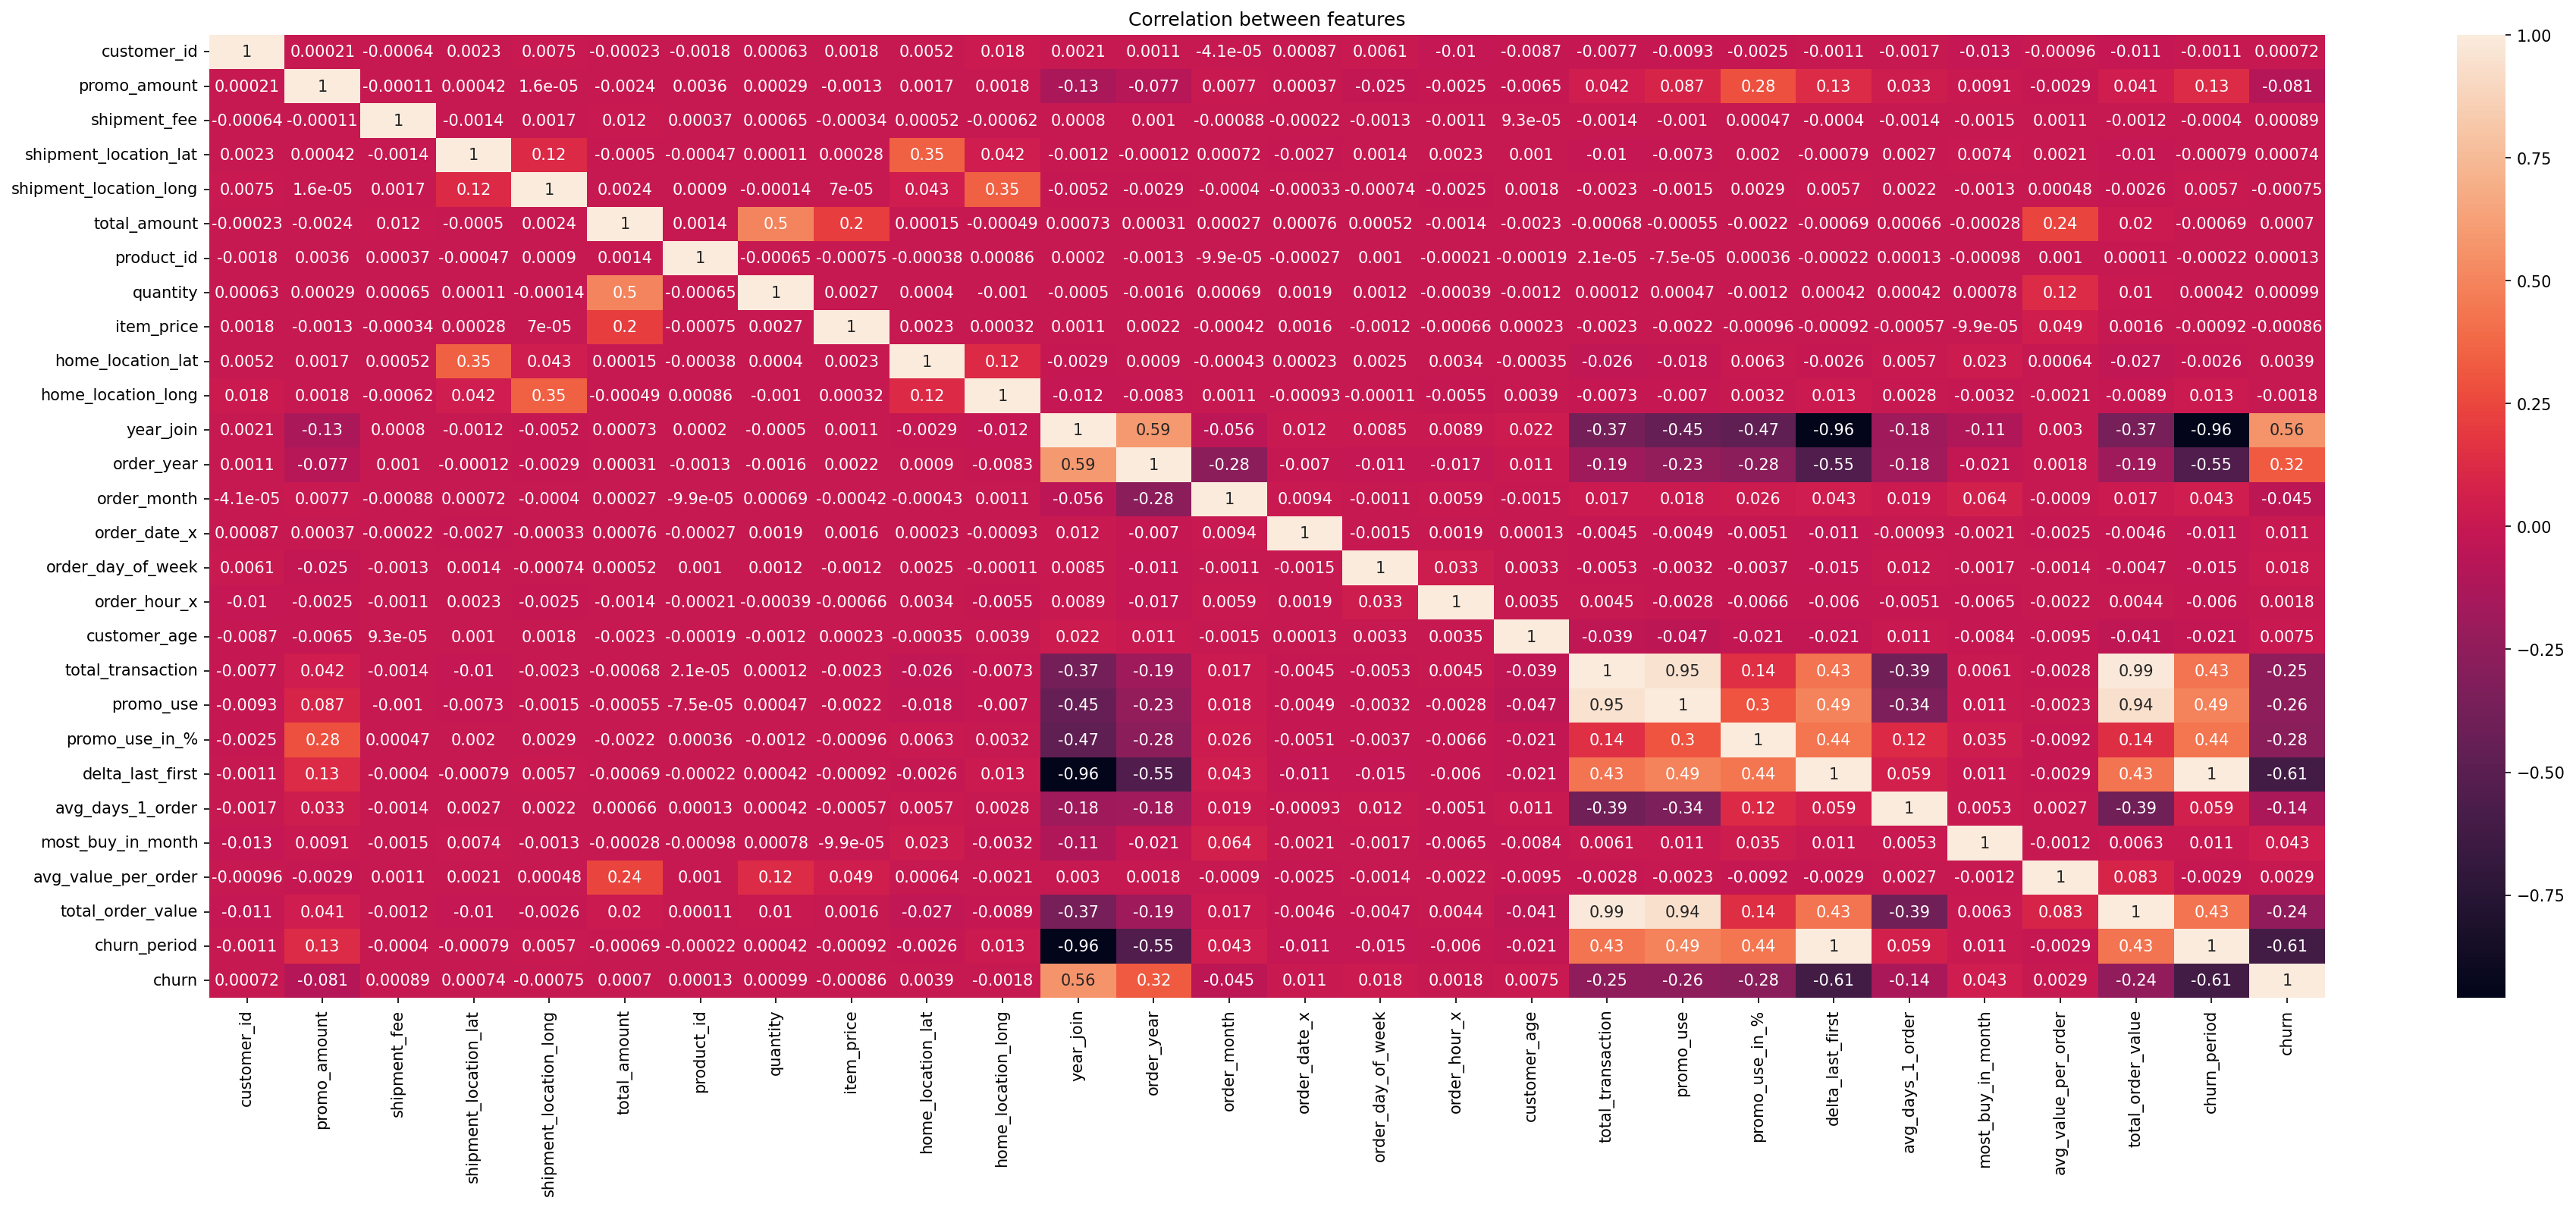

In [ ]:
plt.figure(figsize=(30,11),dpi=150)
sns.heatmap(dataset.corr(),annot=True)
plt.title('Correlation between features')
plt.savefig('corr.png');

## Data Preprocessing

### cek & handling missing value

In [ ]:
missing_values = dataset['promo_code'].isnull().sum()
missing_values

526048

In [ ]:
# Mengganti nilai yang hilang dalam kolom 'promo_code' dengan 'Non promo'
dataset['promo_code'].fillna('Non promo', inplace=True)

In [ ]:
missing_values = dataset['promo_code'].isnull().sum()
missing_values

0

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 61 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   order_created_at                  852584 non-null  object 
 1   customer_id                       852584 non-null  int64  
 2   booking_id                        852584 non-null  object 
 3   session_id                        852584 non-null  object 
 4   payment_method                    852584 non-null  object 
 5   payment_status                    852584 non-null  object 
 6   promo_amount                      852584 non-null  int64  
 7   promo_code                        852584 non-null  object 
 8   shipment_fee                      852584 non-null  int64  
 9   shipment_date_limit               852584 non-null  object 
 10  shipment_location_lat             852584 non-null  float64
 11  shipment_location_long            852584 non-null  f

### Cek duplikat

In [ ]:
def cek_duplikat(dataframe):
  if dataframe.duplicated().sum() > 0 :
    print ('Ada duplikasi data sebanyak {} data' .format(dataframe.duplicated().sum()))
  else:
    print('Tidak ada duplikasi data')
cek_duplikat(dataset)

Tidak ada duplikasi data


In [ ]:
# Menampilkan baris yang merupakan duplikat berdasarkan 'customer_id'
duplicate_rows = dataset.duplicated(subset=['customer_id'])

# Menampilkan beberapa baris pertama dari data duplikat
duplicate_rows_data = dataset[duplicate_rows]
duplicate_rows_data_head = duplicate_rows_data.head()

# Menampilkan hasil
print("Jumlah total baris duplikat berdasarkan 'customer_id':", duplicate_rows.sum())

Jumlah total baris duplikat berdasarkan 'customer_id': 801879


In [ ]:
duplicate_rows_data.head()

order_created_at  customer_id  \
2  2018-09-15 11:51:17.365620+00:00         4774   
3  2018-11-01 11:23:48.365620+00:00         4774   
4  2018-12-18 11:20:30.365620+00:00         4774   
5  2019-02-03 11:25:55.365620+00:00         4774   
6  2019-03-22 11:53:02.365620+00:00         4774   

                             booking_id                            session_id  \
2  6000fffb-9c1a-4f4a-9296-bc8f6b622b50  93325fb6-eb00-4268-bb0e-6471795a0ad0   
3  f5e530a7-4350-4cd1-a3bc-525b5037bcab  bcad5a61-1b67-448d-8ff4-781d67bc56e4   
4  0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2  df1042ab-13e6-4072-b9d2-64a81974c51a   
5  1ed58c46-67fb-4386-924b-983c74ccb4d7  7fa0b583-6d30-40bc-8b61-0f70f5bef30f   
6  c0ced313-e6b1-4a2a-b21f-347eccda5f96  e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a   

  payment_method payment_status  promo_amount     promo_code  shipment_fee  \
2            OVO        Success             0      Non promo         10000   
3    Credit Card        Success             0      Non promo             0   
4    Credit Card        Success             0      Non promo             0   
5     Debit Card        Success          6369  WEEKENDMANTAP          5000   
6    Credit Card        Success             0      Non promo         10000   

           shipment_date_limit  ...  modus_parts_of_month_buy  \
2  2018-09-18T08:41:49.422380Z  ...          end of the month   
3  2018-11-05T17:42:27.954235Z  ...          end of the month   
4  2018-12-23T17:24:07.361785Z  ...          end of the month   
5  2019-02-07T10:41:59.997463Z  ...          end of the month   
6  2019-03-27T14:40:13.181562Z  ...          end of the month   

   modus_parts_of_day_buy  avg_value_per_order  value_type  activity_status  \
2               afternoon        485119.419355      normal           active   
3               afternoon        485119.419355      normal           active   
4               afternoon        485119.419355      normal           active   
5               afternoon        485119.419355      normal           active   
6               afternoon        485119.419355      normal           active   

   total_order_value preferred_payment_type                   churn_threshold  \
2           15038702                    OVO  2019-07-30 12:40:22.365620+00:00   
3           15038702                    OVO  2019-07-30 12:40:22.365620+00:00   
4           15038702                    OVO  2019-07-30 12:40:22.365620+00:00   
5           15038702                    OVO  2019-07-30 12:40:22.365620+00:00   
6           15038702                    OVO  2019-07-30 12:40:22.365620+00:00   

  churn_period churn  
2         1044     0  
3         1044     0  
4         1044     0  
5         1044     0  
6         1044     0  

[5 rows x 61 columns]

In [ ]:
dataset[['customer_id','churn']]

customer_id  churn
0              5868      1
1              4774      0
2              4774      0
3              4774      0
4              4774      0
...             ...    ...
852579        25121      1
852580        34829      1
852581        99645      1
852582        87319      1
852583        58180      1

[852584 rows x 2 columns]

In [ ]:
import pandas as pd

# Jika kolom 'customer_id' dan 'churn' berada dalam DataFrame 'dataset'
duplicated_rows = dataset.duplicated(subset=['customer_id', 'churn'])

# Mencetak baris yang merupakan duplikat
print("Duplikat berdasarkan customer_id dan churn:")
print(dataset[duplicated_rows][['customer_id', 'churn']])

# Mencetak jumlah total duplikat
print("\nJumlah total duplikat:", duplicated_rows.sum())


Duplikat berdasarkan customer_id dan churn:
        customer_id  churn
2              4774      0
3              4774      0
4              4774      0
5              4774      0
6              4774      0
...             ...    ...
852571        37287      1
852572        37287      1
852574        99675      1
852575        99675      1
852579        25121      1

[801879 rows x 2 columns]

Jumlah total duplikat: 801879


`Hapus duplikat berdasarkan costumer id dimana ini mempresentasikan label churn juga`

In [ ]:
import pandas as pd

dataset.drop_duplicates(subset=['customer_id', 'churn'], keep='first', inplace=True)

# Mencetak DataFrame setelah menghapus duplikat
print("DataFrame setelah menghapus duplikat:")
dataset


DataFrame setelah menghapus duplikat:


order_created_at  customer_id  \
0       2018-07-29 15:22:01.458193+00:00         5868   
1       2018-07-30 12:40:22.365620+00:00         4774   
32      2018-07-29 11:43:29.162570+00:00        58191   
129     2018-07-28 21:54:19.891293+00:00        81104   
130     2018-07-29 14:31:23.820299+00:00        47040   
...                                  ...          ...   
852578  2020-11-12 18:19:20.074873+00:00        25121   
852580  2021-12-09 07:35:18.222046+00:00        34829   
852581  2021-12-11 01:20:36.944593+00:00        99645   
852582  2019-12-18 11:01:09.623382+00:00        87319   
852583  2019-12-19 12:47:14.701215+00:00        58180   

                                  booking_id  \
0       186e2bee-0637-4710-8981-50c2d737bc42   
1       caadb57b-e808-4f94-9e96-8a7d4c9898db   
32      dc043ec2-bf57-4b4f-99ee-00e2645d6c6c   
129     bac0b0f2-8f5f-4501-990c-b0bb678f43fa   
130     d93e6b1f-ccc1-4512-a3b4-f1360726dd3f   
...                                      ...   
852578  7fdc05d1-234b-4889-a343-587ffc0635d5   
852580  ccde6b83-ee42-4cce-b2cd-976574886eac   
852581  5bcd3434-1dc6-44bb-ae63-fd19714cbd6c   
852582  af7f291a-b01b-4bfd-89a9-237b16368b15   
852583  b242e188-5f94-4448-a038-c5865842374b   

                                  session_id payment_method payment_status  \
0       3abaa6ce-e320-4e51-9469-d9f3fa328e86     Debit Card        Success   
1       2ee5ead1-f13e-4759-92df-7ff48475e970    Credit Card        Success   
32      461f30b0-d42a-4c82-9738-6a5b1ef1b1e7            OVO        Success   
129     01c6ed30-f2be-461e-875c-9273a732654a            OVO        Success   
130     3684c0f2-299a-4fe6-b037-ac20d8cbe236            OVO        Success   
...                                      ...            ...            ...   
852578  33c3bf4f-0f24-4eb8-879d-906bf7e7736a     Debit Card        Success   
852580  954e1211-4d45-4d0b-ba84-53e80119592c            OVO        Success   
852581  e6e6c108-abd0-49a2-b0a5-691117f9cfe1    Credit Card        Success   
852582  bb6e5426-a3f3-426a-b99d-79173eaa234b    Credit Card        Success   
852583  5e3183df-198b-40e0-b861-27ef694a832a          Gopay        Success   

        promo_amount     promo_code  shipment_fee  \
0               1415    WEEKENDSERU         10000   
1                  0      Non promo         10000   
32              3125  WEEKENDMANTAP         10000   
129                0      Non promo         10000   
130             3461    WEEKENDSERU         25000   
...              ...            ...           ...   
852578             0      Non promo         10000   
852580          5010         AZ2022         10000   
852581          2181    WEEKENDSERU          5000   
852582          4503         AZ2022             0   
852583          4724        BUYMORE         10000   

                shipment_date_limit  ...  modus_parts_of_month_buy  \
0       2018-08-03T05:07:24.812676Z  ...          end of the month   
1       2018-08-03T01:29:03.415705Z  ...          end of the month   
32      2018-08-01T21:32:37.736077Z  ...          end of the month   
129     2018-08-03T09:41:09.649080Z  ...          end of the month   
130     2018-08-01T14:52:09.022049Z  ...          end of the month   
...                             ...  ...                       ...   
852578  2020-11-18T18:06:06.493534Z  ...          end of the month   
852580  2021-12-12T07:52:44.803822Z  ...    beginning of the month   
852581  2021-12-12T13:28:22.848703Z  ...          mid of the month   
852582  2019-12-23T22:56:46.831720Z  ...          end of the month   
852583  2019-12-23T06:02:05.828334Z  ...          end of the month   

        modus_parts_of_day_buy  avg_value_per_order  value_type  \
0                    afternoon         1.998320e+05      normal   
1                    afternoon         4.851194e+05      normal   
32                     evening         4.902438e+05      normal   
129                      night         1.957050e+05      normal   
130         

### Proporsi Churn

In [ ]:
# Menghitung proporsi churn
proporsi_churn = dataset['churn'].value_counts()

# Mencetak proporsi churn
print("Proporsi Churn setelah menghapus duplikat:")
proporsi_churn

Proporsi Churn setelah menghapus duplikat:


0    30095
1    20610
Name: churn, dtype: int64

In [ ]:
cek = [
    'customer_age',
    'total_order_value',
    'promo_use',
    'activity_status',
    'item_price',
    'shipment_fee',
    'modus_parts_of_day_buy',
    'total_transaction'
]
df_cek = dataset[cek]

In [ ]:
df_cek.head()

customer_age  total_order_value  promo_use activity_status  item_price  \
0              23             199832          1      passive II      191247   
1              27           15038702         12          active      145526   
32             10           47553651         36          active      224954   
129            28             195705          0      passive II      185705   
130            25             545304          2       passive I      232625   

     shipment_fee modus_parts_of_day_buy  total_transaction  
0           10000              afternoon                  1  
1           10000              afternoon                 31  
32          10000                evening                 97  
129         10000                  night                  1  
130         25000                evening                  3

## Modelling

### menentukan fitur & target

In [ ]:
selected_features = [
    'customer_age',
    'promo_use',
    'activity_status',
    'payment_status',
    'item_price',
    'shipment_fee',
    'modus_parts_of_day_buy',
]

# Memilih fitur-fitur dan kolom target
df_selected = dataset[selected_features + ['churn']]

# Memeriksa data yang telah dipilih
df_selected.head()


customer_age  promo_use activity_status payment_status  item_price  \
0              23          1      passive II        Success      191247   
1              27         12          active        Success      145526   
32             10         36          active        Success      224954   
129            28          0      passive II        Success      185705   
130            25          2       passive I        Success      232625   

     shipment_fee modus_parts_of_day_buy  churn  
0           10000              afternoon      1  
1           10000              afternoon      0  
32          10000                evening      0  
129         10000                  night      1  
130         25000                evening      0

### encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Memilih fitur-fitur dan kolom target
df_selected = dataset[selected_features + ['churn']]

# Melakukan label encoding untuk 'activity_status' dan 'modus_parts_of_day_buy'
label_encoder = LabelEncoder()

df_selected['activity_status_encoded'] = label_encoder.fit_transform(df_selected['activity_status'])
df_selected['modus_parts_of_day_buy_encoded'] = label_encoder.fit_transform(df_selected['modus_parts_of_day_buy'])
df_selected['payment_status_encoded'] = label_encoder.fit_transform(df_selected['payment_status'])

# Menghapus kolom asli yang sudah di-encode
df_selected = df_selected.drop(['activity_status', 'modus_parts_of_day_buy', 'payment_status'], axis=1)

# Memeriksa data yang telah dipilih
df_selected.head()


<ipython-input-10-c2df563f83d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['activity_status_encoded'] = label_encoder.fit_transform(df_selected['activity_status'])
<ipython-input-10-c2df563f83d5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['modus_parts_of_day_buy_encoded'] = label_encoder.fit_transform(df_selected['modus_parts_of_day_buy'])
<ipython-input-10-c2df563f83d5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

customer_age  promo_use  item_price  shipment_fee  churn  \
0              23          1      191247         10000      1   
1              27         12      145526         10000      0   
32             10         36      224954         10000      0   
129            28          0      185705         10000      1   
130            25          2      232625         25000      0   

     activity_status_encoded  modus_parts_of_day_buy_encoded  \
0                          2                               0   
1                          0                               0   
32                         0                               1   
129                        2                               3   
130                        1                               1   

     payment_status_encoded  
0                         1  
1                         1  
32                        1  
129                       1  
130                       1

In [ ]:
# Memilih fitur dan label
X = df_selected.drop(columns=['churn'])
y = df_selected['churn']

## Split data

In [ ]:
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Melihat jumlah data pada set training
jumlah_data_train = len(X_train)
print("Jumlah Data Training Set:", jumlah_data_train)

# Melihat jumlah data pada set testing
jumlah_data_test = len(X_test)
print("Jumlah Data Testing Set:", jumlah_data_test)


Jumlah Data Training Set: 40564
Jumlah Data Testing Set: 10141


## Imbalance Data Handling

In [ ]:
from imblearn.over_sampling import SMOTE

# Lakukan oversampling pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Cek proporsi churn setelah oversampling
print("\nProporsi Churn setelah oversampling:")
print(pd.Series(y_train_resampled).value_counts())


Proporsi Churn setelah oversampling:
0    24072
1    24072
Name: churn, dtype: int64


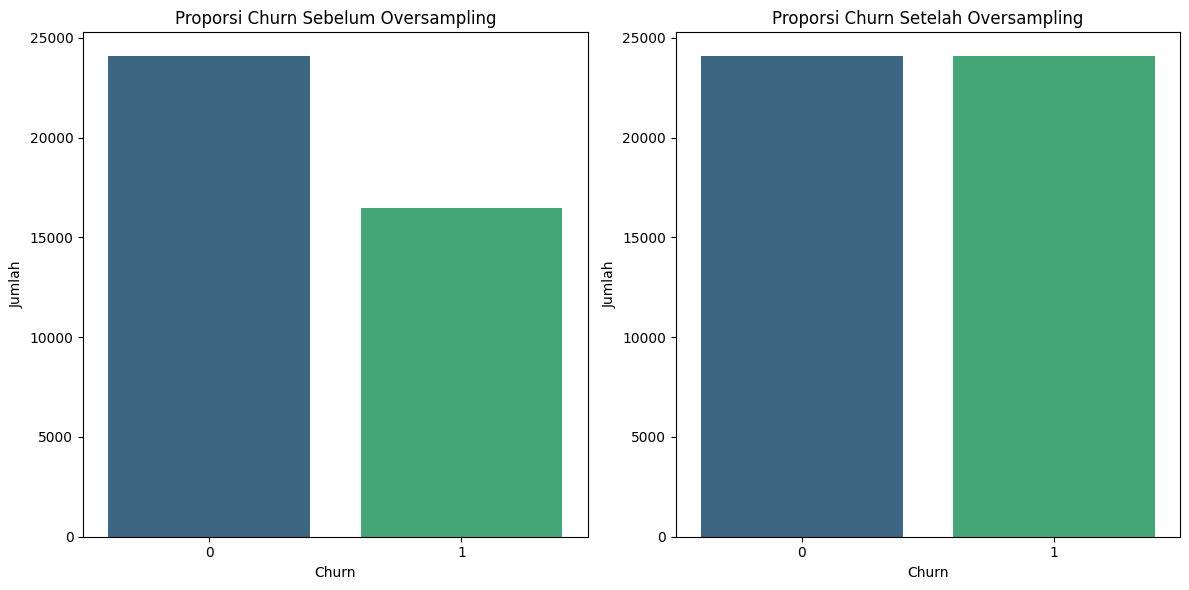

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi proporsi churn sebelum dan setelah oversampling
plt.figure(figsize=(12, 6))

# Plot proporsi churn sebelum oversampling
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='viridis')
plt.title("Proporsi Churn Sebelum Oversampling")
plt.xlabel("Churn")
plt.ylabel("Jumlah")

# Plot proporsi churn setelah oversampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled, palette='viridis')
plt.title("Proporsi Churn Setelah Oversampling")
plt.xlabel("Churn")
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()


## Random Forest

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
preds = rf.predict(X_test)
rf_f1 = f1_score(y_test,preds)
rf_recall = recall_score(y_test,preds)
rf_precision = precision_score(y_test,preds)
rf_acc = accuracy_score(y_test,preds)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      6023
           1       0.78      0.84      0.81      4118

    accuracy                           0.84     10141
   macro avg       0.83      0.84      0.83     10141
weighted avg       0.84      0.84      0.84     10141



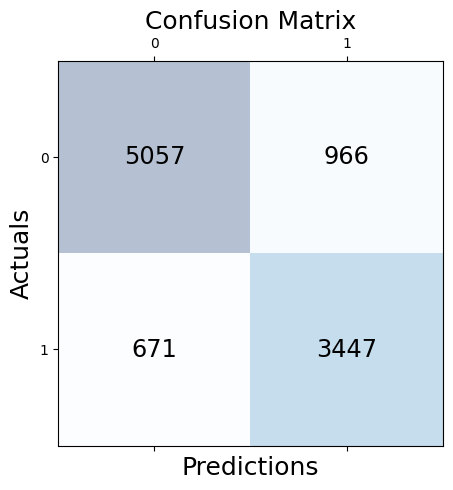

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

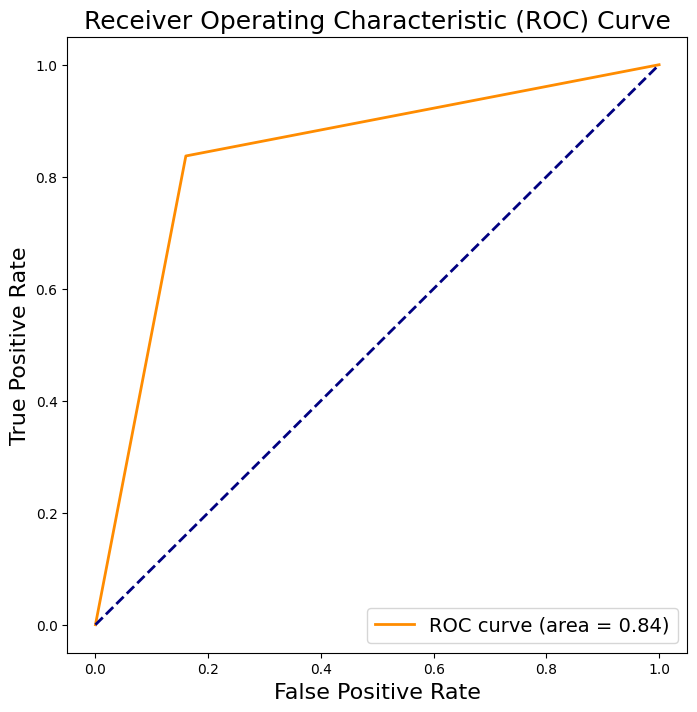

In [ ]:
# Calculate ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.legend(loc='lower right', fontsize=14)
plt.show()

### RandomForest + Random Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf' : [3,4]
}
rs_rf = RandomForestClassifier(random_state=101)

In [ ]:
rscv_rf = RandomizedSearchCV(rs_rf, param_grid, cv= 5,verbose=2)
rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=100; total time=   2.7s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=100; total time=   2.7s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=100; total time=   2.1s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=100; total time=   1.9s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, n_estimators=100; total time=   1.9s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   3.4s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   4.1s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   5.8s
[CV] END criterion=gini, ma

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.5s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=200; total time=   3.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=200; total time=   3.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=200; total time=   7.6s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=200; total time=   3.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=200; total time=   3.5s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   1.9s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.1s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_l

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [3, 4],
                                        'n_estimators': [100, 200]},
                   verbose=2)

In [ ]:
rscv_rf.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini'}

In [ ]:
best_params = {'n_estimators': 200,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini'}

In [ ]:
rs_rf = RandomForestClassifier(**best_params)
rs_rf.fit(X_train_resampled, y_train_resampled)
preds = rs_rf.predict(X_test)
rs_rf_f1 = f1_score(y_test,preds)
rs_rf_recall = recall_score(y_test,preds)
rs_rf_precision = precision_score(y_test,preds)
rs_rf_acc = accuracy_score(y_test,preds)
print(classification_report(y_test,preds))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      6023
           1       0.82      0.84      0.83      4118

    accuracy                           0.86     10141
   macro avg       0.86      0.86      0.86     10141
weighted avg       0.86      0.86      0.86     10141



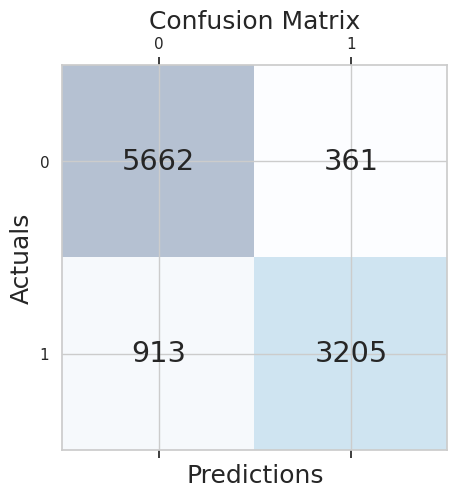

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

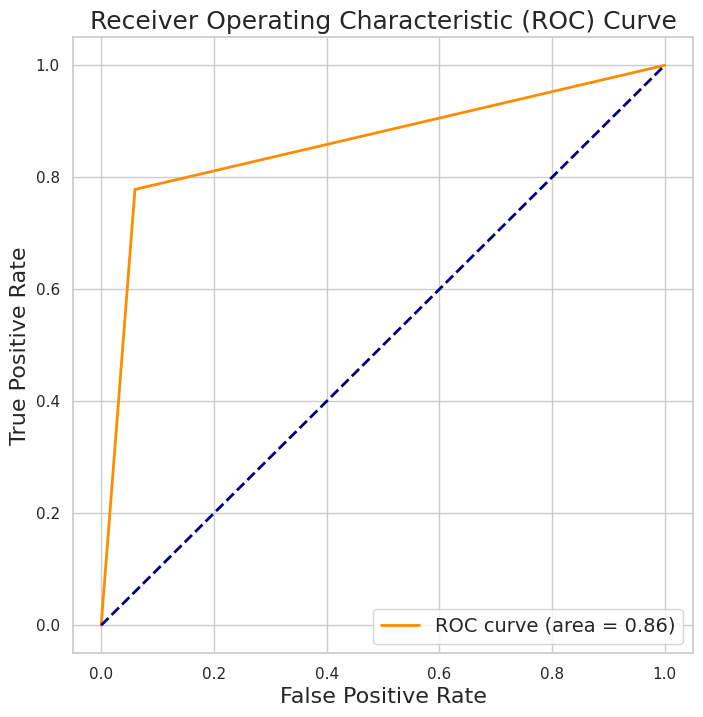

In [ ]:
# Calculate ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.legend(loc='lower right', fontsize=14)
plt.show()

### RandomForest + GriSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf' : [3,4]
}
rs_rf = RandomForestClassifier(random_state=101)

In [ ]:
gscv_rf = GridSearchCV(rs_rf, param_grid, cv= 5,verbose=2)
gscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   1.7s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.3s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.3s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.3s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   3.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   3.1s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.9s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   1.7s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   1.7s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   1.7s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   1.7s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.1s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   4.9s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   3.7s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.6s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   1.9s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.7s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.8s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.3s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   1.8s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   3.6s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   3.6s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   1.7s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   1.9s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.6s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.6s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   3.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   3.4s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   3.7s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   1.9s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   1.9s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.8s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.8s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.4s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   3.7s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   3.8s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, n_estimators=200; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, n_estimators=200; total time=   5.6s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.1s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   2.7s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   5.9s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, n_estimators=200; total time=   4.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4],
                         'n_estimators': [100, 200]},
             verbose=2)

In [ ]:
gscv_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'n_estimators': 100}

In [ ]:
best_params = {'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'n_estimators': 100}

In [ ]:
gs_rf = RandomForestClassifier(**best_params)
gs_rf.fit(X_train_resampled, y_train_resampled)
preds =gs_rf.predict(X_test)
gs_rf_f1 = f1_score(y_test,preds)
gs_rf_recall = recall_score(y_test,preds)
gs_rf_precision = precision_score(y_test,preds)
gs_rf_acc = accuracy_score(y_test,preds)
print(classification_report(y_test,preds))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.90      0.87      0.88      6023
           1       0.81      0.86      0.83      4118

    accuracy                           0.86     10141
   macro avg       0.86      0.86      0.86     10141
weighted avg       0.86      0.86      0.86     10141



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_pred = dt_model.predict(X_test)

In [ ]:

# Evaluasi model Decision Tree
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
dt_class_report = classification_report(y_test, dt_pred)


print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')
print('\nDecision Tree Classification Report:\n', dt_class_report)

Decision Tree Accuracy: 0.80

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      6023
           1       0.73      0.82      0.77      4118

    accuracy                           0.80     10141
   macro avg       0.79      0.80      0.80     10141
weighted avg       0.81      0.80      0.80     10141



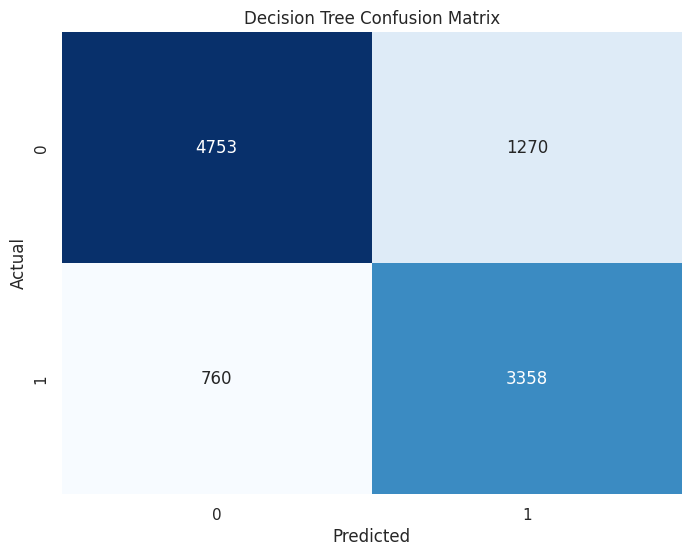

In [ ]:
# Visualisasi hasil evaluasi Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


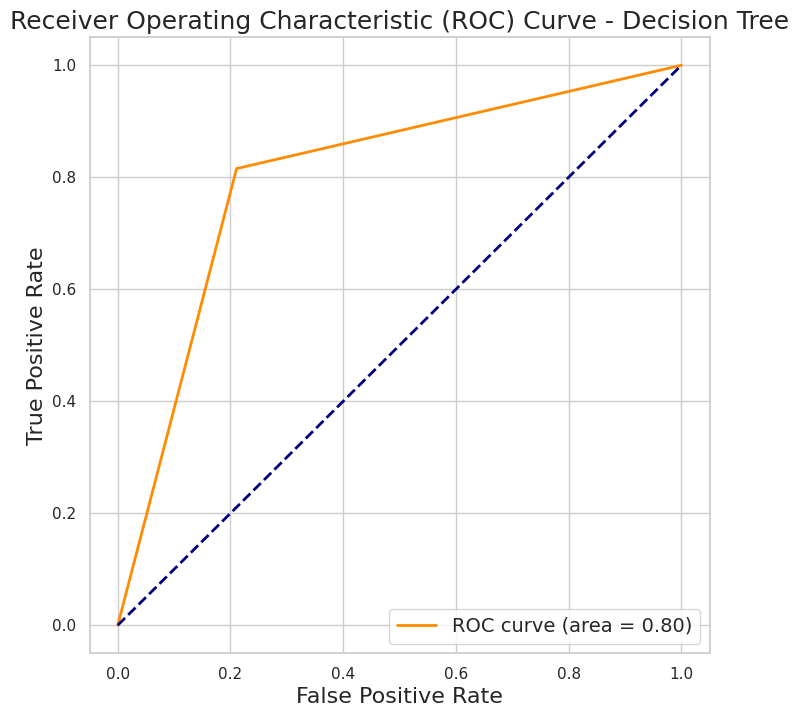

In [ ]:
# Calculate ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, dt_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree', fontsize=18)
plt.legend(loc='lower right', fontsize=14)
plt.show()

                          Feature  Importance
1                       promo_use    0.376175
2                      item_price    0.264657
4         activity_status_encoded    0.203145
0                    customer_age    0.094938
3                    shipment_fee    0.034122
5  modus_parts_of_day_buy_encoded    0.021107
6          payment_status_encoded    0.005856


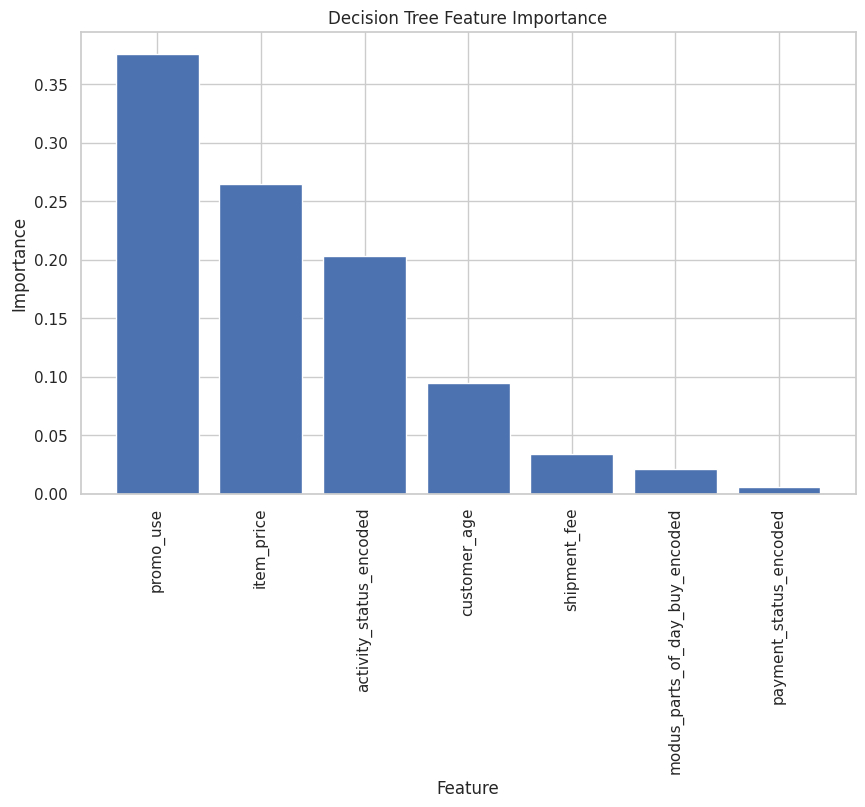

In [ ]:
# Get feature importances
feature_importances = dt_model.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values('Importance', ascending=False)

# Print or visualize the feature importances
print(importances_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

### Decision Tree +Grid Search +CV [**TERBAIK**]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning menggunakan GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Mendapatkan model terbaik setelah hyperparameter tuning
best_dt_model = grid_search_dt.best_estimator_

# Prediksi pada data uji dengan model terbaik
dt_pred_tuned = best_dt_model.predict(X_test)

# Evaluasi model Decision Tree setelah hyperparameter tuning
dt_accuracy_tuned = accuracy_score(y_test, dt_pred_tuned)
dt_conf_matrix_tuned = confusion_matrix(y_test, dt_pred_tuned)
dt_class_report_tuned = classification_report(y_test, dt_pred_tuned)

print('Best Hyperparameters:', grid_search_dt.best_params_)
print(f'\nDecision Tree Accuracy (after tuning): {dt_accuracy_tuned:.2f}')
print('\nDecision Tree Classification Report (after tuning):\n', dt_class_report_tuned)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}

Decision Tree Accuracy (after tuning): 0.87

Decision Tree Classification Report (after tuning):
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      6023
           1       0.84      0.86      0.85      4118

    accuracy                           0.87     10141
   macro avg       0.87      0.87      0.87     10141
weighted avg       0.87      0.87      0.87     10141



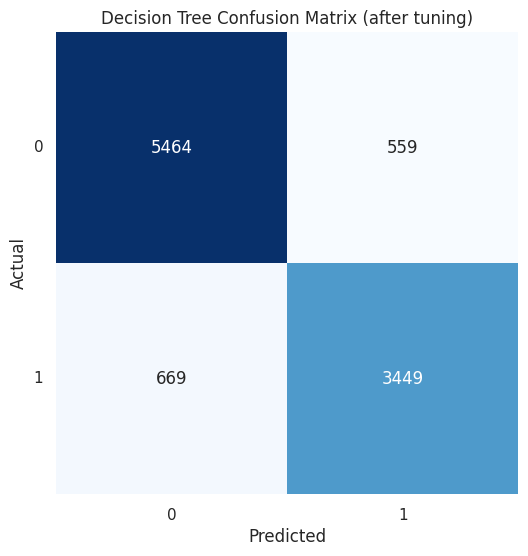

In [ ]:
# Visualisasi hasil evaluasi Decision Tree setelah hyperparameter tuning
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix_tuned, annot=True, fmt='g', cmap='Blues', cbar=False, square=True)
plt.title('Decision Tree Confusion Matrix (after tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'], rotation=0)
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'], rotation=0)
plt.show()

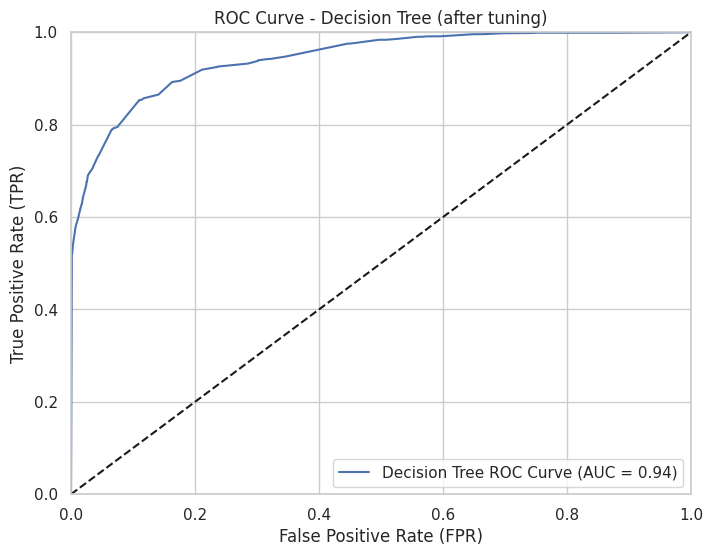

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Menghitung nilai ROC-AUC
dt_roc_auc = roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1])

# Mendapatkan nilai False Positive Rate (fpr) dan True Positive Rate (tpr) untuk kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, best_dt_model.predict_proba(X_test)[:, 1])

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree ROC Curve (AUC = {dt_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Garis acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Decision Tree (after tuning)')
plt.legend(loc="lower right")
plt.show()


                          Feature  Importance
1                       promo_use    0.319117
2                      item_price    0.260143
4         activity_status_encoded    0.252633
0                    customer_age    0.103846
5  modus_parts_of_day_buy_encoded    0.034293
3                    shipment_fee    0.026766
6          payment_status_encoded    0.003202


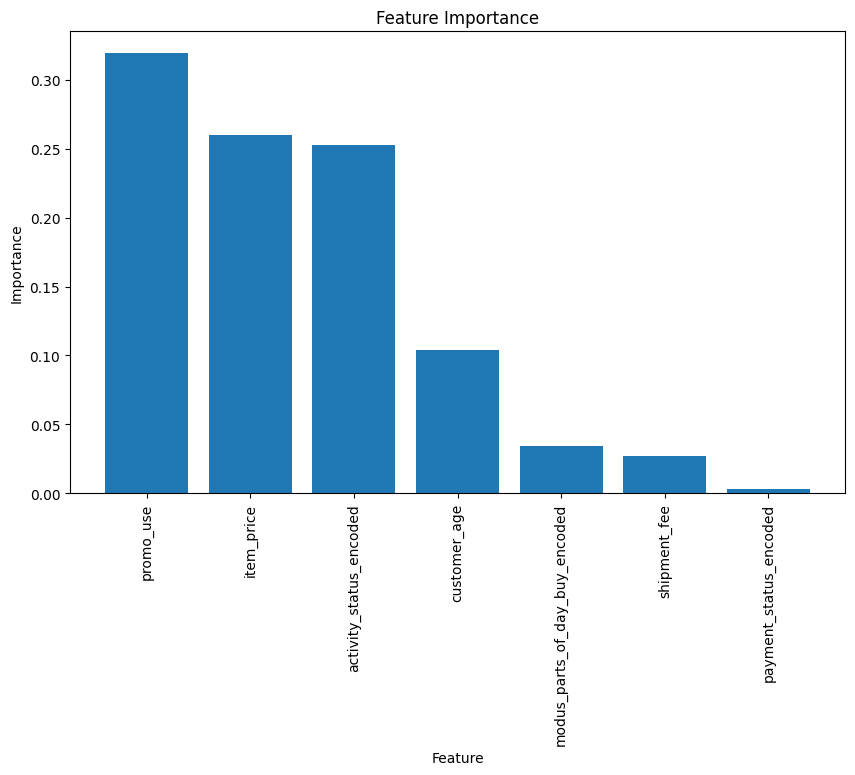

In [ ]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values('Importance', ascending=False)

# Print or visualize the feature importances
print(importances_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)
preds = knn.predict(X_test)
knn_f1 = f1_score(y_test,preds)
knn_recall = recall_score(y_test,preds)
knn_precision = precision_score(y_test,preds)
knn_acc = accuracy_score(y_test,preds)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.61      0.52      0.56      6023
           1       0.42      0.51      0.46      4118

    accuracy                           0.52     10141
   macro avg       0.51      0.51      0.51     10141
weighted avg       0.53      0.52      0.52     10141



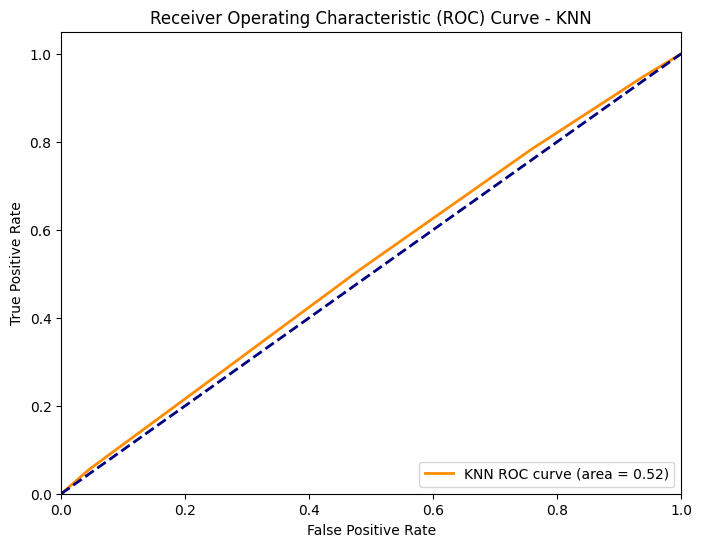

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Prediksi probabilitas kelas positif pada data uji dengan model KNN
knn_probs = knn.predict_proba(X_test)[:, 1]

# Menghitung nilai ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_probs)

# Menghitung luas area di bawah kurva ROC (AUC) untuk KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve untuk KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'KNN ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()


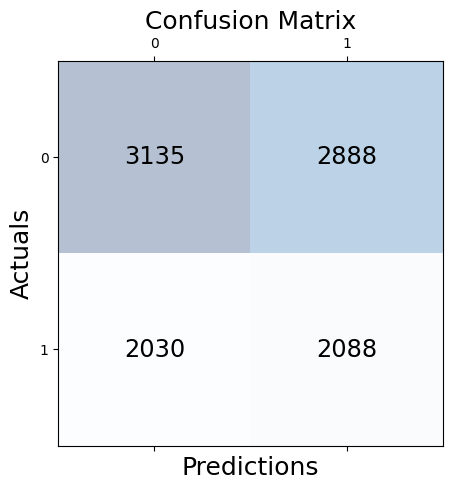

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### KNN + Grid Search CV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Hyperparameter tuning menggunakan GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_resampled, y_train_resampled)

# Mendapatkan model terbaik setelah hyperparameter tuning
best_knn_model = grid_search_knn.best_estimator_

# Prediksi pada data uji dengan model terbaik
knn_pred_tuned = best_knn_model.predict(X_test)

# Evaluasi model K-Nearest Neighbors setelah hyperparameter tuning
knn_accuracy_tuned = accuracy_score(y_test, knn_pred_tuned)
knn_conf_matrix_tuned = confusion_matrix(y_test, knn_pred_tuned)
knn_class_report_tuned = classification_report(y_test, knn_pred_tuned)

print('Best Hyperparameters:', grid_search_knn.best_params_)
print(f'\nKNN Accuracy (after tuning): {knn_accuracy_tuned:.2f}')
print('\nKNN Classification Report (after tuning):\n', knn_class_report_tuned)

Best Hyperparameters: {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

KNN Accuracy (after tuning): 0.53

KNN Classification Report (after tuning):
               precision    recall  f1-score   support

           0       0.62      0.52      0.57      6023
           1       0.43      0.53      0.48      4118

    accuracy                           0.53     10141
   macro avg       0.53      0.53      0.52     10141
weighted avg       0.54      0.53      0.53     10141



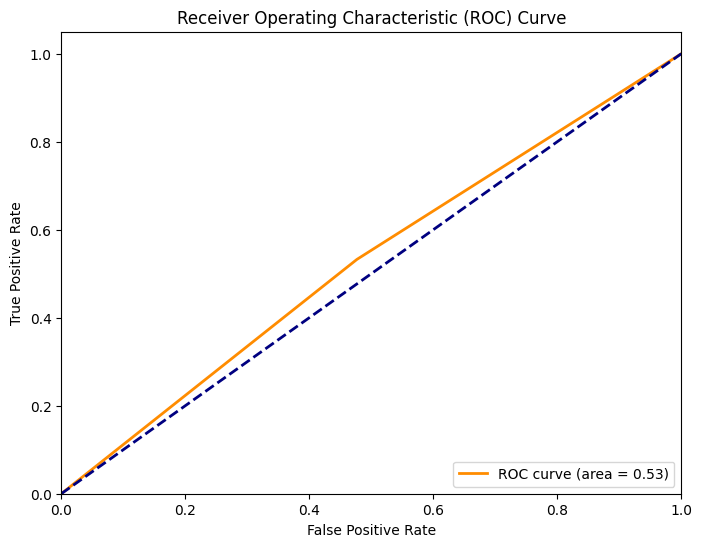

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Menghitung nilai ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_tuned)

# Menghitung luas area di bawah kurva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## XGBoost

In [ ]:
from xgboost import XGBClassifier


In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_resampled, y_train_resampled)
preds = xgb.predict(X_test)
xgb_f1 = f1_score(y_test,preds)
xgb_recall = recall_score(y_test,preds)
xgb_precision = precision_score(y_test,preds)
xgb_acc = accuracy_score(y_test,preds)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6023
           1       0.81      0.87      0.84      4118

    accuracy                           0.86     10141
   macro avg       0.86      0.86      0.86     10141
weighted avg       0.86      0.86      0.86     10141



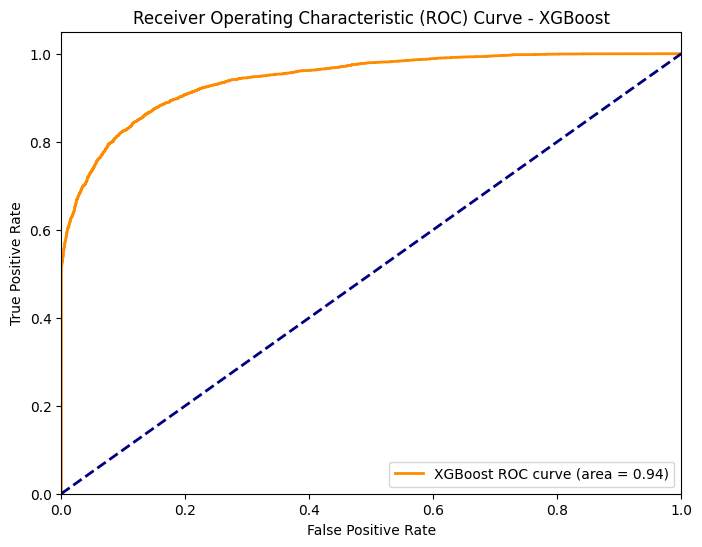

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Prediksi probabilitas kelas positif pada data uji dengan model XGBoost
xgb_probs = xgb.predict_proba(X_test)[:, 1]

# Menghitung nilai ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_probs)

# Menghitung luas area di bawah kurva ROC (AUC) untuk XGBoost
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve untuk XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()


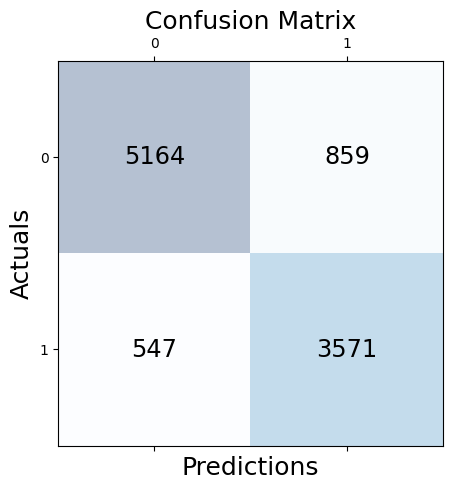

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### XGBoost + Random Search CV

In [ ]:
xg_param_grid = {
     'learning_rate': [i/100.0 for i in range(1,21,1)],
        'n_estimators': range(100, 210, 10),
        'max_depth': range(1, 11, 1),
        'gamma': [i/10.0 for i in range(1,10,1)],
        'reg_alpha': [i/1000.0 for i in range(0,100,1)],
        'reg_lambda': [i/100.0 for i in range(0,1000,10)]
}
xg = XGBClassifier()

In [ ]:
cv_xg = RandomizedSearchCV(xg, xg_param_grid, cv= 5,verbose=2)
cv_xg.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.2, learning_rate=0.04, max_depth=9, n_estimators=160, reg_alpha=0.099, reg_lambda=1.8; total time=   8.2s
[CV] END gamma=0.2, learning_rate=0.04, max_depth=9, n_estimators=160, reg_alpha=0.099, reg_lambda=1.8; total time=   0.9s
[CV] END gamma=0.2, learning_rate=0.04, max_depth=9, n_estimators=160, reg_alpha=0.099, reg_lambda=1.8; total time=   0.9s
[CV] END gamma=0.2, learning_rate=0.04, max_depth=9, n_estimators=160, reg_alpha=0.099, reg_lambda=1.8; total time=   0.9s
[CV] END gamma=0.2, learning_rate=0.04, max_depth=9, n_estimators=160, reg_alpha=0.099, reg_lambda=1.8; total time=   0.8s
[CV] END gamma=0.5, learning_rate=0.19, max_depth=3, n_estimators=200, reg_alpha=0.095, reg_lambda=0.7; total time=   0.3s
[CV] END gamma=0.5, learning_rate=0.19, max_depth=3, n_estimators=200, reg_alpha=0.095, reg_lambda=0.7; total time=   0.4s
[CV] END gamma=0.5, learning_rate=0.19, max_depth=3, n_estimators=200, reg_alp

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'n_estimators': range(100, 210, 10),
                                        'reg_alpha': [0.0, 0.001, 0.002, 0.003,
                                                      0.004, 0.005, 0.006,
                                                      0.007, 0.008, 0.009, 0.01,
                                                      0.011, 0.012, 0.013,
                                                      0.014, 0.015, 0.016,
                                                      0.017, 0.018, 0.019, 0.02,
                                                      0.021, 0.022, 0.023,
                                                      0.024, 0.025, 0.026,
                                                      0.027, 0.028, 0.029, ...],
                                        'reg_lambda': [0.0, 0.1, 0.2, 0.3, 0.4,
                                                       0.5, 0.6, 0.7, 0.8, 0.9,
                                                       1.0, 1.1, 1.2, 1.3, 1.4,
                                                       1.5, 1.6, 1.7, 1.8, 1.9,
                                                       2.0, 2.1, 2.2, 2.3, 2.4,
                                                       2.5, 2.6, 2.7, 2.8, 2.9, ...]},
                   verbose=2)

In [ ]:
cv_xg.best_params_

{'reg_lambda': 4.2,
 'reg_alpha': 0.089,
 'n_estimators': 130,
 'max_depth': 10,
 'learning_rate': 0.18,
 'gamma': 0.2}

In [ ]:
best_params = {'reg_lambda': 4.2,
 'reg_alpha': 0.089,
 'n_estimators': 130,
 'max_depth': 10,
 'learning_rate': 0.18,
 'gamma': 0.2}

In [ ]:
xg = XGBClassifier(**best_params)
xg.fit(X_train_resampled, y_train_resampled)
preds = xg.predict(X_test)
xg_f1 = f1_score(y_test,preds)
xg_recall = recall_score(y_test,preds)
xg_precision = precision_score(y_test,preds)
xg_acc = accuracy_score(y_test,preds)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      6023
           1       0.81      0.87      0.84      4118

    accuracy                           0.86     10141
   macro avg       0.86      0.86      0.86     10141
weighted avg       0.87      0.86      0.86     10141



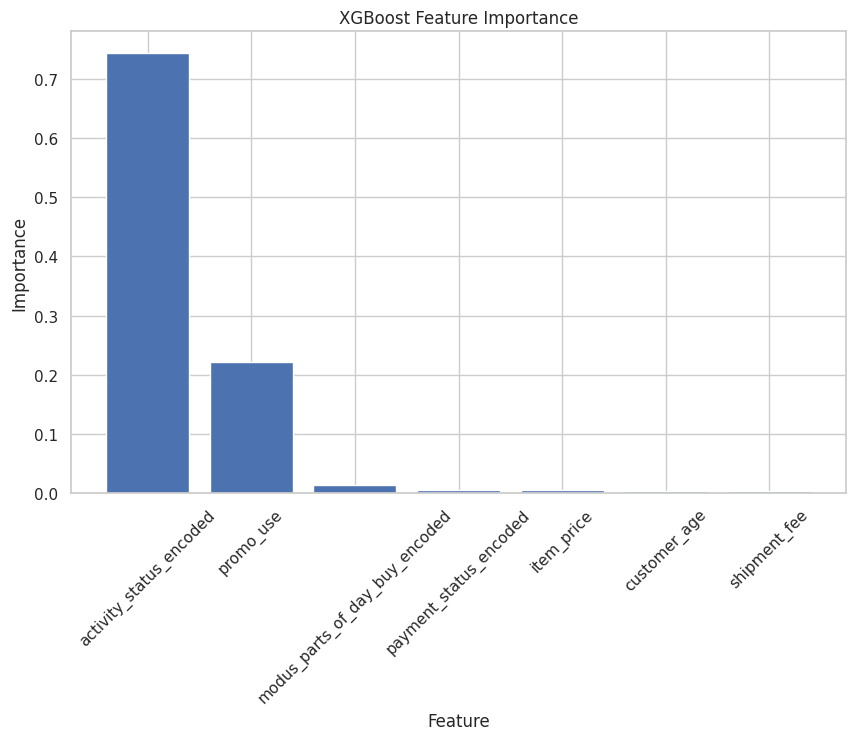

In [ ]:
# Get feature importances
feature_importances = xg.feature_importances_

# Sort features based on importance
sorted_idx = feature_importances.argsort()[::-1]

# Get feature names
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("XGBoost Feature Importance")
plt.show()

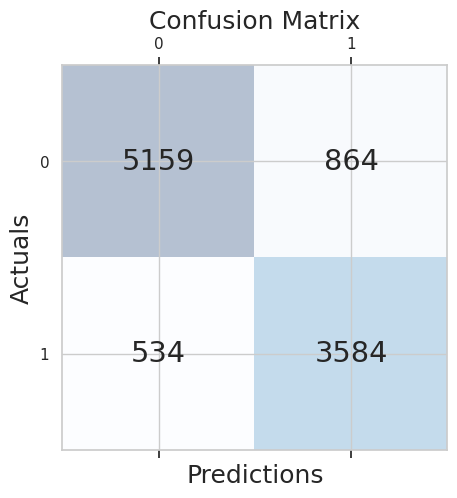

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### XGBoost + Grid Search CV

In [ ]:
xg_param_grid = {
     'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.3]
}

In [ ]:
gs_xg = GridSearchCV(xg, xg_param_grid, cv= 5,verbose=2)
gs_xg.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   1.6s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.5s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.5s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.4s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=60; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=140; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=2, n_e

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.2,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.18, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=10,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=130,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.3],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             verbose=2)

In [ ]:
gs_xg.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 60}

In [ ]:
{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 60}

In [ ]:
gs_xg = XGBClassifier(**best_params)
gs_xg.fit(X_train_resampled, y_train_resampled)
preds = gs_xg.predict(X_test)
gs_xg_f1 = f1_score(y_test,preds)
gs_xg_recall = recall_score(y_test,preds)
gs_xg_precision = precision_score(y_test,preds)
gs_xg_acc = accuracy_score(y_test,preds)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      6023
           1       0.81      0.87      0.84      4118

    accuracy                           0.86     10141
   macro avg       0.86      0.86      0.86     10141
weighted avg       0.87      0.86      0.86     10141



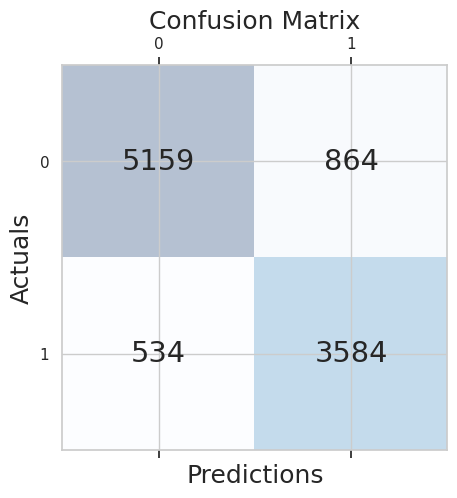

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

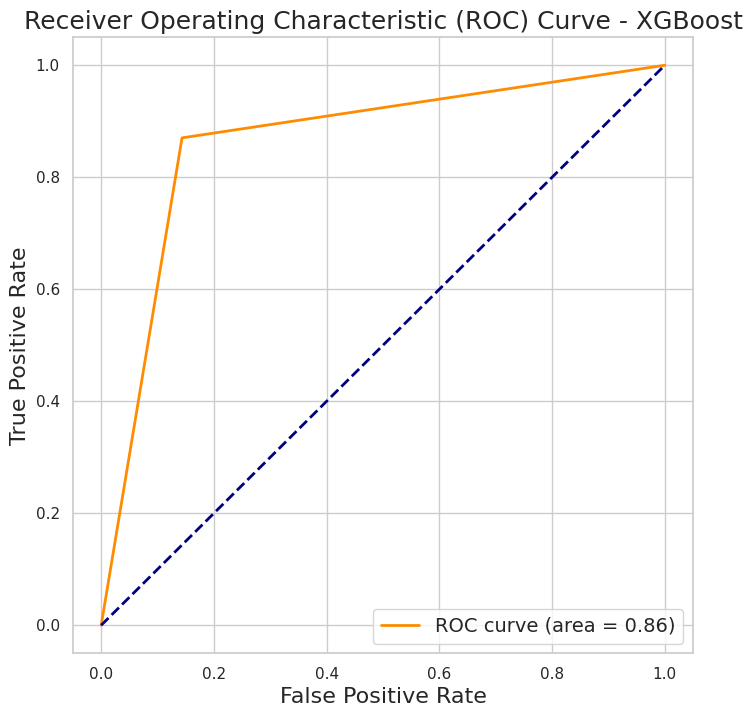

In [ ]:
# Calculate ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost', fontsize=18)
plt.legend(loc='lower right', fontsize=14)
plt.show()

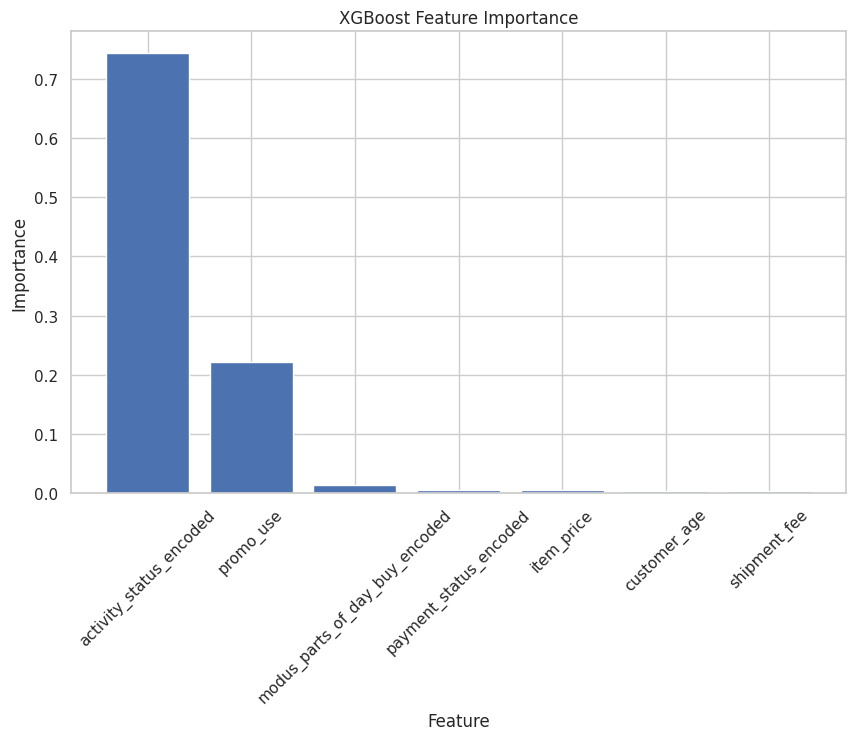

In [ ]:
# Get feature importances
feature_importances = gs_xg.feature_importances_

# Sort features based on importance
sorted_idx = feature_importances.argsort()[::-1]

# Get feature names
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("XGBoost Feature Importance")
plt.show()

# Conclusion

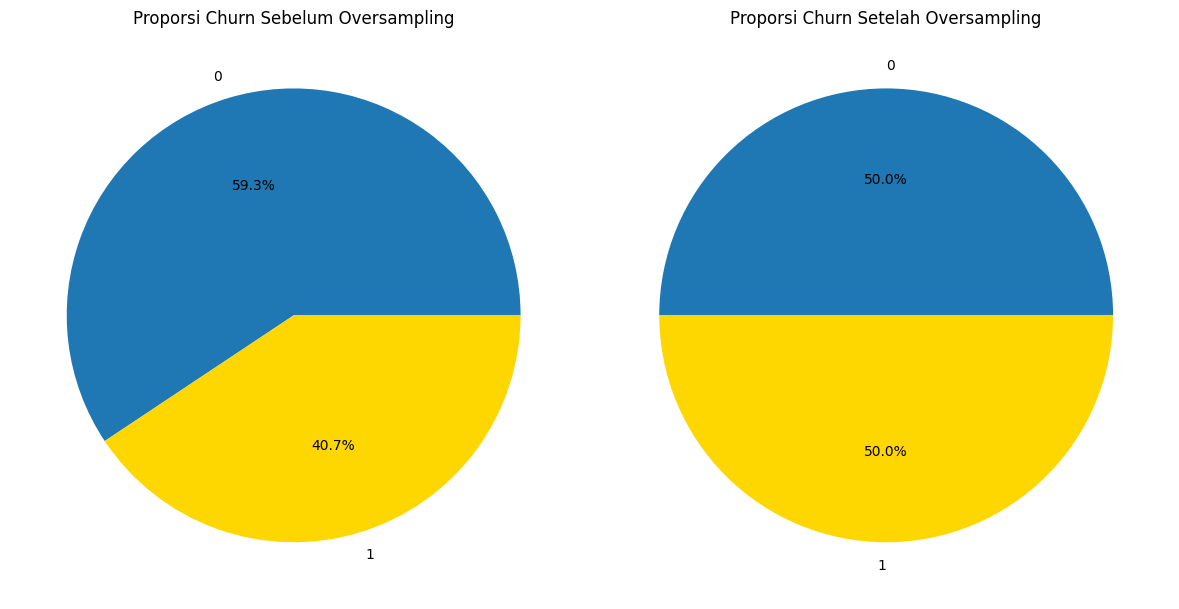

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom colors for dark blue and dark yellow
custom_colors = ['#1f77b4', '#FFD700']

# Visualisasi proporsi churn sebelum dan setelah oversampling
plt.figure(figsize=(12, 6))

# Plot proporsi churn sebelum oversampling menggunakan pie chart dengan warna biru tua
plt.subplot(1, 2, 1)
plt.title("Proporsi Churn Sebelum Oversampling")
y_train.value_counts().plot.pie(autopct='%1.1f%%', colors=custom_colors)
plt.ylabel("")  # Menghilangkan label y

# Plot proporsi churn setelah oversampling menggunakan pie chart dengan warna kuning tua
plt.subplot(1, 2, 2)
plt.title("Proporsi Churn Setelah Oversampling")
y_train_resampled.value_counts().plot.pie(autopct='%1.1f%%', colors=custom_colors)
plt.ylabel("")  # Menghilangkan label y

plt.tight_layout()
plt.show()


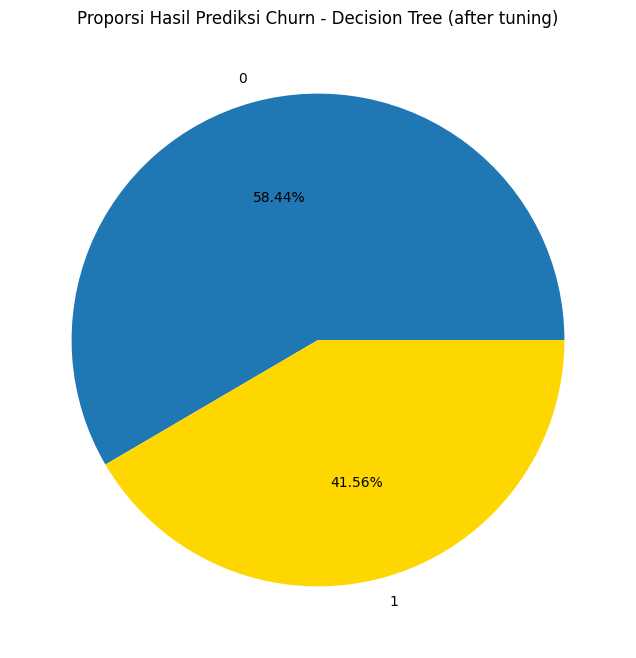

In [ ]:
import seaborn as sns

# Menghitung proporsi hasil prediksi churn
proporsi_prediksi = pd.Series(best_dt_model.predict(X_test)).value_counts(normalize=True)

# Custom colors for dark blue and dark yellow
custom_colors = ['#1f77b4', '#FFD700']

# Visualisasi pie chart hanya dengan persentase
plt.figure(figsize=(8, 8))
proporsi_prediksi.plot.pie(autopct='%1.2f%%', colors=custom_colors)
plt.title('Proporsi Hasil Prediksi Churn - Decision Tree (after tuning)')
plt.ylabel('')  # Menghilangkan label y
plt.show()


## Best Model :
Decision Tree +Grid Search + CV

* Best Hyperparameters: `{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}`

* Akurasi (Accuracy): Model mencapai akurasi sekitar 87%, menunjukkan kemampuan model untuk memprediksi dengan benar kelas churn dan non-churn pada data uji.
* Precision: Precision 0 (non-churn) sekitar 90%, sedangkan precision 1 (churn) sekitar 84%. Precision mengukur seberapa banyak dari prediksi churn yang benar-benar benar.
* Recall: Recall 0 sekitar 88%, sedangkan recall 1 sekitar 86%. Recall mengukur sejauh mana model dapat mengidentifikasi sebagian besar instance dari kelas tertentu.
* F1-Score: F1-score sekitar 0.89 untuk kelas non-churn dan 0.85 untuk kelas churn. F1-score adalah harmonic mean dari precision dan recall.




---


Analisis Feature Importance Decision Tree +Grid Search + CV:


* Promo Use: Fitur ini memiliki feature importance tertinggi, menunjukkan bahwa penggunaan promo memiliki dampak signifikan terhadap model dalam menganalisis churn. `Pelanggan yang aktif menggunakan promo cenderung memiliki pengaruh besar terhadap keputusan churn, dan strategi promosi yang efektif dapat menjadi kunci untuk mempertahankan pelanggan.`

* Item Price : Harga item juga memiliki kontribusi besar terhadap model, menunjukkan bahwa sensitivitas pelanggan terhadap harga dapat memengaruhi keputusan churn. `Perhatian terhadap strategi penetapan harga dan penawaran khusus mungkin kritikal dalam mempertahankan pelanggan`.

* Activity Status: Status aktivitas pelanggan (encoded) memiliki dampak yang signifikan,` menandakan bahwa pelanggan yang aktif bertransaksi memiliki kecenderungan lebih tinggi untuk tetap setia. Monitoring dan merespons terhadap aktivitas pelanggan dapat menjadi kunci dalam meminimalkan churn.`

* Customer Age: Meskipun customer age memiliki feature importance yang lebih rendah, s`trategi pemasaran yang disesuaikan dengan rentang usia pelanggan dapat meningkatkan relevansi kampanye dan kepuasan pelanggan, potensial meningkatkan kinerja bisnis secara keseluruhan`. Bisnis dapat memanfaatkan data usia untuk personalisasi pengalaman pelanggan dan menyesuaikan komunikasi pemasaran untuk memaksimalkan dampaknya

* Modus Parts of Day Buy: Pola waktu pembelian tertentu juga memberikan kontribusi, menunjukkan bahwa `preferensi waktu pembelian pelanggan dapat memengaruhi keputusan mereka untuk tetap atau pergi`.

* Shipment Fee: Biaya pengiriman memiliki dampak yang lebih rendah, tetapi tetap memberikan kontribusi. `Pemahaman terhadap sensitivitas pelanggan terhadap biaya pengiriman dapat membantu dalam pengelolaan dan penyesuaian strategi biaya.`

* Payment Status: Status pembayaran memiliki dampak paling rendah, tetapi tetap relevan. Meskipun kontribusinya kecil,` memahami pola pembayaran pelanggan dapat memberikan wawasan tambahan dalam strategi retensi.`



## Recommendation



* Optimalkan Penggunaan Promo (Promo Use): Fokus pada strategi promosi yang lebih efektif, termasuk penawaran khusus atau diskon yang dapat meningkatkan keterlibatan pelanggan. Melibatkan pelanggan dalam program promosi yang menarik dapat membantu mempertahankan mereka.

* Manajemen Harga Produk (Item Price): Pertimbangkan strategi penetapan harga yang lebih dinamis, dengan memahami sensitivitas pelanggan terhadap perubahan harga. Mungkin juga perlu untuk mengevaluasi kebijakan diskon atau bundling produk yang dapat meningkatkan nilai pelanggan.

* Stimulasi Aktivitas Pelanggan (Activity Status): Fokus pada strategi untuk meningkatkan aktivitas pelanggan. Inisiatif seperti program loyalitas, insentif transaksi, atau penawaran eksklusif untuk pelanggan yang aktif dapat mendorong retensi.

* Analisis Pola Waktu Pembelian (Modus Parts of Day Buy): Pahami pola waktu pembelian pelanggan dan sesuaikan strategi pemasaran atau penawaran khusus untuk mencocokkan preferensi waktu mereka. Mungkin ada peluang untuk meningkatkan interaksi pada waktu-waktu tertentu.

* Evaluasi Biaya Pengiriman (Shipment Fee): Evaluasi kebijakan biaya pengiriman, termasuk opsi bebas biaya atau diskon biaya untuk pembelian tertentu. Ini dapat meminimalkan hambatan potensial yang terkait dengan biaya pengiriman.

* Optimalkan Proses Pembayaran (Payment Status): Meskipun memiliki dampak rendah, pemahaman lebih lanjut terhadap pola pembayaran pelanggan dapat membantu dalam penyesuaian strategi pembayaran, termasuk pengoptimalan metode pembayaran atau penawaran khusus untuk pembayaran tepat waktu.




---



> Untuk pelanggan "active," perusahaan dapat memberikan penawaran khusus atau
promo pada waktu-waktu di mana mereka aktif berbelanja.

> Untuk pelanggan "passive I" dan "passive II," perusahaan dapat merancang strategi untuk meningkatkan keterlibatan dan aktivitas pembelian. Ini mungkin melibatkan penawaran khusus atau program insentif untuk mendorong pelanggan melakukan lebih banyak transaksi.



---




* Perhatikan Modus Waktu Pembelian: Meskipun memiliki dampak yang lebih kecil, tetap memperhatikan pola waktu pembelian bisa memberikan wawasan tentang kebiasaan pelanggan. Mungkin ada peluang untuk menyesuaikan penawaran atau promosi berdasarkan waktu tertentu dalam sehari.
